# PROBLEM STATEMENT

Retail companies, in their pursuit of unraveling the intricacies of customer behavior, have been striving to understand consumption patterns and improve predictive capabilities. In this endeavor, my primary objective is to develop a comprehensive predictive model that delves into the diverse customer base, anticipating the specific products they are likely to purchase. Utilizing a robust dataset encompassing extensive customer details, product information, and historical order data, the goal is to discern nuanced patterns and trends that drive purchasing decisions. The predictive model will intricately incorporate various factors, including customer demographics, order history, and product attributes. To elevate the model's performance, sophisticated feature engineering techniques will be explored, ensuring the creation of pertinent features that contribute to enhanced prediction accuracy. The overarching ambition is to furnish actionable insights empowering marketing and sales teams with targeted product recommendations, optimizing customer satisfaction and maximizing sales opportunities. This predictive analytics endeavor stands as a pivotal step toward unlocking the full potential of business intelligence, fostering informed decision-making, and driving sustained growth in a dynamic market landscape.


**Research Questions:**

1. **RQ1: Holistic Customer Segmentation and Demographics Analysis**
   - How can I develop a comprehensive customer segmentation strategy, considering a diverse range of demographic, psychographic, and behavioral characteristics?
   - What influence do cultural and regional factors have on my customers' preferences, and how can I incorporate these nuances into my segmentation strategies?

2. **RQ2: In-depth Exploration of My Consumption Patterns**
   - What are the longitudinal aspects of my customer consumption patterns, and how do these evolve over time?
   - How can I integrate machine learning algorithms to identify subtle patterns, anomalies, and outliers in my large-scale historical order data?

3. **RQ3: Advancing My Predictive Modeling for Personalized Recommendations**
   - In addition to traditional predictive modeling, how can I incorporate advanced techniques such as deep learning to achieve more nuanced and personalized product recommendations?
   - What role do external factors like macroeconomic indicators and social trends play in enhancing the accuracy of my predictive models?

4. **RQ4: Feature Engineering for Multi-dimensional Insights**
   - How can I leverage not only my customer details, product information, and order history but also incorporate external data sources for comprehensive feature engineering?
   - What techniques can I employ to assess the importance and interaction of various features in driving predictive accuracy?

5. **RQ5: Actionable Insights Across My Organization**
   - Beyond marketing and sales, how can actionable insights be extended to other touchpoints such as customer support and product development?
   - What strategies can I implement to ensure seamless communication and application of insights across different departments within my organization?

**Objectives:**

1. **Objective 1: Integration of Multifaceted Customer Segmentation**
   - I aim to develop a comprehensive framework for customer segmentation that considers a diverse set of demographic, psychographic, and behavioral factors.

2. **Objective 2: Longitudinal Analysis of My Consumption Patterns**
   - I will conduct an in-depth longitudinal analysis of my customer consumption patterns, exploring temporal variations and seasonality.

3. **Objective 3: Integration of Advanced Predictive Modeling Techniques**
   - I intend to explore and implement advanced predictive modeling techniques, including deep learning, to provide more personalized and accurate product recommendations.

4. **Objective 4: Comprehensive Feature Engineering Framework**
   - I am dedicated to developing a robust framework for feature engineering that incorporates not only traditional customer and product data but also external data sources for a multi-dimensional view.

5. **Objective 5: Cross-Functional Application of Actionable Insights**
   - I will establish protocols and communication channels for the dissemination and application of actionable insights across various departments, fostering a holistic organizational approach.

6. **Objective 6: Real-time Adaptation and Continuous Improvement**
   - I aim to implement mechanisms for real-time adaptation of strategies based on evolving consumer trends, ensuring continuous improvement in the accuracy and relevance of my predictive models.


# Data cleaning and preparation

# data imporation


In the process of importing data into my Spark environment, I initiated a Spark session using the PySpark library, marking the beginning of my data processing journey. Specifying the path to the folder where my CSV files reside, I meticulously curated a list of these files, filtering only those with the '.csv' extension. This step ensured a focused approach to my data loading endeavor. Employing a dynamic and scalable strategy, I proceeded to iterate through each CSV file within the designated folder. For every iteration, I conscientiously extracted the file name (excluding the extension) and employed it as a variable name. This approach aimed at maintaining clarity and organization within my environment. With each iteration, I invoked Spark's `read.csv` method, reading the contents of the CSV file into a distinct DataFrame. These DataFrames were then not only appended to a list for a comprehensive overview but, more significantly, embedded into my environment using their respective file names as variable references. This meticulous orchestration enabled seamless access to each DataFrame by its designated variable, thereby facilitating subsequent analysis and exploration. The conclusive act of displaying the contents of each DataFrame using the `show()` method underscored the successful importation of diverse datasets, each now poised for further exploration and insightful analysis within my Spark environment.

In [1]:
from pyspark.sql import SparkSession
import os

def load_csv_files_into_dataframes(folder_path):
    """
    Load multiple CSV files into Spark DataFrames and save them in the environment with their file names.

    Parameters:
    - folder_path (str): The path to the folder containing the CSV files.

    Returns:
    - List of Spark DataFrames.
    """
    # Initialize a Spark session
    spark = SparkSession.builder.appName("CSVLoaderFunction").getOrCreate()

    # Get a list of all CSV files in the folder
    csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

    # Create a list to store the DataFrames
    dataframes = []

    # Create variables for each DataFrame
    for csv_file in csv_files:
        # Use the file name (without extension) as the variable name
        df_name = os.path.splitext(csv_file)[0]
        # Read the CSV file into a DataFrame
        df = spark.read.csv(os.path.join(folder_path, csv_file), header=True, inferSchema=True)
        # Save the DataFrame in the environment with its file name
        globals()[df_name] = df
        # Append the DataFrame to the list
        dataframes.append(df)

    return dataframes

# Example usage:
folder_path = r'C:\Users\neste\OneDrive\Desktop\karanja\DataSet_final\DataSet_final'
loaded_dataframes = load_csv_files_into_dataframes(folder_path)

# Show the contents of each DataFrame
DimGeography.show()
DimAccount.show()
DimCurrency.show()
DimCustomer.show()
DimDate.show()
DimDepartmentGroup.show()
DimOrganization.show()
DimProduct.show()
DimProductCategory.show()
DimProductSubcategory.show()
DimPromotion.show()
DimReseller.show()
DimSalesReason.show()
DimSalesTerritory.show()
DimScenario.show()
FactCallCenter.show()
FactCurrencyRate.show()
FactInternetSales.show()



+------------+--------------+-----------------+-----------------+-----------------+------------------------+------------------------+-----------------------+----------+-----------------+----------------+
|GeographyKey|          City|StateProvinceCode|StateProvinceName|CountryRegionCode|EnglishCountryRegionName|SpanishCountryRegionName|FrenchCountryRegionName|PostalCode|SalesTerritoryKey|IpAddressLocator|
+------------+--------------+-----------------+-----------------+-----------------+------------------------+------------------------+-----------------------+----------+-----------------+----------------+
|           1|    Alexandria|              NSW|  New South Wales|               AU|               Australia|               Australia|              Australie|      2015|                9|    198.51.100.2|
|           2| Coffs Harbour|              NSW|  New South Wales|               AU|               Australia|               Australia|              Australie|      2450|                

# data preparation

## data joining 

In weaving together a comprehensive dataset for analysis, I embarked on a series of strategic joins, each adding a layer of richness to the information at hand. Initially, I sought to enhance the understanding of product-related data by merging the `FactInternetSales` data with `DimProduct` through a join on the common ground of `ProductKey`. This amalgamation aimed to facilitate a deeper exploration of product-centric insights, incorporating details such as product subcategories, names, and key attributes.

Subsequently, my focus shifted to customer-centric insights. Through a join with `DimCustomer`, I seamlessly integrated customer-specific information into the evolving dataset, using the `CustomerKey` as the bridge. This strategic decision allowed for a holistic examination of customer behavior, encompassing demographics, purchase history, and other pertinent details.

The inclusion of promotional details became the next logical step in unraveling the dynamics of sales. By merging with `DimPromotion` based on the shared `PromotionKey`, I introduced promotional aspects such as names, discount percentages, and categories. This step added a temporal dimension to the dataset, enabling a closer examination of the impact of promotions on sales patterns.

Considering the financial dimension, the dataset expanded to include currency-related insights through a join with `DimCurrency` using the common identifier `CurrencyKey`. This addition allowed for a standardized representation of monetary values, enhancing the precision of financial analyses.

Sales territory details were seamlessly incorporated into the dataset by joining with `DimSalesTerritory` using the `SalesTerritoryKey` as a linking element. This strategic inclusion provided geographical context to sales data, facilitating analyses related to regional trends, market performance, and customer distribution.

To deepen the understanding of product subcategories, I orchestrated a join with `DimProductSubcategory`, utilizing the `ProductSubcategoryKey` as the connection point. This step allowed for a more nuanced exploration of product types and their categorizations, enabling insights into product preferences and market segments.

Finally, a geographical layer was added to the dataset through a join with `DimGeography`, utilizing the `GeographyKey` as the amalgamating factor. This geographical context provided a framework for exploring regional variations, customer distribution across cities, and other spatial considerations.

Each join in this sequential process was a deliberate choice aimed at creating a comprehensive and interconnected dataset. The rationale behind these joins was rooted in the pursuit of a holistic understanding of the business landscape. By integrating diverse dimensions such as products, customers, promotions, currencies, sales territories, and geography, the resulting dataset stands poised to offer nuanced insights, empowering data-driven decision-making processes.

In [2]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, to_date, expr

# Select the specific columns from DimProduct
selected_columns = ["ProductKey", "ProductSubcategoryKey", "EnglishProductName", "FinishedGoodsFlag",
                    "Color", "SafetyStockLevel", "ReorderPoint", "SizeRange", "DaysToManufacture"]

dim_product_selected = DimProduct.select(selected_columns)

# Perform the join operation on ProductKey
prepared_data = FactInternetSales.join(dim_product_selected, "ProductKey")


# Select the specific columns from DimCustomer, including DateFirstPurchase
customer_selected_columns = ["CustomerKey", "GeographyKey", "NameStyle", "BirthDate", "MaritalStatus", "Gender",
                              "YearlyIncome", "TotalChildren", "NumberChildrenAtHome", "EnglishEducation",
                              "EnglishOccupation", "HouseOwnerFlag", "NumberCarsOwned", "CommuteDistance",
                              "DateFirstPurchase"]

dim_customer_selected = DimCustomer.select(customer_selected_columns)

# Perform the join operation on CustomerKey
prepared_data = prepared_data.join(dim_customer_selected, "CustomerKey")

# Select the specific columns from DimPromotion
promotion_selected_columns = ["PromotionKey", "EnglishPromotionName", "DiscountPct", "EnglishPromotionCategory", "MinQty"]

dim_promotion_selected = DimPromotion.select(promotion_selected_columns)

# Perform the join operation on PromotionKey with the existing prepared_data DataFrame
prepared_data = prepared_data.join(dim_promotion_selected, "PromotionKey")


# Select the specific column from DimCurrency
currency_selected_columns = ["CurrencyKey", "CurrencyName"]

dim_currency_selected = DimCurrency.select(currency_selected_columns)

# Perform the join operation on CurrencyKey with the existing prepared_data DataFrame
prepared_data = prepared_data.join(dim_currency_selected, "CurrencyKey")


# Select the specific columns from DimSalesTerritory
sales_territory_selected_columns = ["SalesTerritoryKey", "SalesTerritoryRegion", "SalesTerritoryCountry"]

dim_sales_territory_selected = DimSalesTerritory.select(sales_territory_selected_columns)

# Perform the join operation on SalesTerritoryKey with the existing prepared_data DataFrame
prepared_data = prepared_data.join(dim_sales_territory_selected, "SalesTerritoryKey")



# Select the specific columns from DimProductSubcategory
product_subcategory_selected_columns = ["ProductSubcategoryKey", "EnglishProductSubcategoryName"]

dim_product_subcategory_selected = DimProductSubcategory.select(product_subcategory_selected_columns)

# Perform the join operation on ProductSubcategoryKey with the existing prepared_data DataFrame
prepared_data = prepared_data.join(dim_product_subcategory_selected, "ProductSubcategoryKey")

# Select the specific columns from DimGeography
geography_selected_columns = ["GeographyKey", "City", "StateProvinceName"]

dim_geography_selected = DimGeography.select(geography_selected_columns)

# Perform the join operation on GeographyKey with the existing prepared_data DataFrame
prepared_data = prepared_data.join(dim_geography_selected, "GeographyKey")

# Convert the numeric representation to a string and then to a DateType
prepared_data = prepared_data.withColumn(
    "OrderDate",
    to_date(expr("cast(OrderDateKey as string)"), "yyyyMMdd")
)

# Show the resulting DataFrame
prepared_data.show()

+------------+---------------------+-----------------+-----------+------------+-----------+----------+------------+----------+-----------+----------------+--------------------+--------------+-------------+---------+--------------+--------------------+--------------+-------------------+----------------+-----------+--------+-------+---------------------+----------------+----------+-------+--------+--------------------+-----------------+------+----------------+------------+---------+-----------------+---------+----------+-------------+------+------------+-------------+--------------------+-------------------+-----------------+--------------+---------------+---------------+-----------------+--------------------+-----------+------------------------+------+--------------------+--------------------+---------------------+-----------------------------+-------------+-------------------+
|GeographyKey|ProductSubcategoryKey|SalesTerritoryKey|CurrencyKey|PromotionKey|CustomerKey|ProductKey|OrderDat

In [3]:
from pyspark.sql import DataFrame
from pyspark.sql.functions import col, to_date, expr, month, year
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, to_date, month, year, expr

def perform_joins(fact_df: DataFrame, *dimension_dfs: DataFrame, join_keys: list, date_column: str = None):
    """
    Perform a series of joins between a Fact DataFrame and multiple Dimension DataFrames.

    Parameters:
    - fact_df: The Fact DataFrame to start with.
    - dimension_dfs: A variable number of Dimension DataFrames to join with the Fact DataFrame.
    - join_keys: A list of join keys to be used in the order of the joins.
    - date_column: Optional. If provided, convert this numeric column to DateType.

    Returns:
    - The resulting DataFrame after all the specified joins.
    """
    prepared_data = fact_df

    for dimension_df, join_key in zip(dimension_dfs, join_keys):
        prepared_data = prepared_data.join(dimension_df, join_key)

    if date_column:
        # Convert the numeric representation to a string and then to a DateType
        prepared_data = prepared_data.withColumn(
            "OrderDate",
            to_date(expr(f"cast({date_column} as string)"), "yyyyMMdd")
        )

    return prepared_data

# Example usage:
prepared_data = perform_joins(
    FactInternetSales,
    DimProduct,
    DimCustomer,
    DimPromotion,
    DimCurrency,
    DimSalesTerritory,
    DimProductSubcategory,
    DimGeography,
    join_keys=["ProductKey", "CustomerKey", "PromotionKey", "CurrencyKey", "SalesTerritoryKey", "ProductSubcategoryKey", "GeographyKey"],
    date_column="OrderDateKey"
)

# Extract order month and order year
prepared_data = prepared_data.withColumn("OrderMonth", month("OrderDate"))
prepared_data = prepared_data.withColumn("OrderYear", year("OrderDate"))




# Show the resulting DataFrame
prepared_data.show()

+------------+---------------------+-----------------+-----------+------------+-----------+----------+------------+----------+-----------+----------------+--------------------+--------------+-------------+---------+--------------+--------------------+--------------+-------------------+----------------+-----------+--------+-------+---------------------+----------------+----------+-------+--------+-------------------+---------------------+-------------------+--------------------+--------------------+--------------------+------------+-----------------+------+----------------+------------+---------+----+---------+------+-----------------+-----------+-----------+-----+-----+------------+--------------------+----------------+----------------+------+--------------------+-----+---------+----------+---------+---------+----------+-------------+------+------+--------------------+------------+-------------+--------------------+-------------------+--------------------+---------------+--------------

# cleaned data 
In the refinement of our dataset, I have strategically excluded several columns that contribute limited value to our specific analytical goals. These excluded columns encompass various keys, identifiers, and descriptive attributes that, while potentially valuable in other contexts, are deemed extraneous for our current data exploration objectives.

This meticulous exclusion process aims to enhance the precision and relevance of our dataset, creating a more focused DataFrame named "cleaned_data." By eliminating non-essential information, we optimize the dataset for subsequent analyses, ensuring that the retained data aligns closely with the specific insights we seek to derive. This precision-driven approach not only streamlines the dataset but also facilitates a more efficient and meaningful exploration, enhancing the potential for uncovering valuable patterns and trends pertinent to our analytical objectives.

In [4]:
columns_to_exclude = [
    "GeographyKey", "ProductSubcategoryKey", "SalesTerritoryKey", "CurrencyKey", "PromotionKey",
    "CustomerKey", "ProductKey", "OrderDateKey", "DueDateKey", "ShipDateKey", "SalesOrderNumber",
    "SalesOrderLineNumber", "RevisionNumber", "OrderQuantity", "CarrierTrackingNumber",
    "CustomerPONumber", "OrderDate", "DueDate", "ShipDate", "ProductAlternateKey",
    "SpanishProductName", "FrenchProductName", "EnglishDescription", "StartDate", "EndDate", "Status",
    "CustomerAlternateKey", "Title", "FirstName", "MiddleName", "LastName", "BirthDate", "EmailAddress",
    "SpanishEducation", "FrenchEducation", "EnglishOccupation", "SpanishOccupation", "FrenchOccupation",
    "AddressLine1", "AddressLine2", "Phone", "DateFirstPurchase", "SpanishPromotionName",
    "FrenchPromotionName", "EnglishPromotionType", "SpanishPromotionType", "FrenchPromotionType",
    "SpanishPromotionCategory", "FrenchPromotionCategory", "StartDate", "EndDate", "MaxQty",
    "CurrencyAlternateKey", "ProductCategoryKey", "StateProvinceCode", "CountryRegionCode",
    "SpanishCountryRegionName", "FrenchCountryRegionName", "PostalCode", "SalesTerritoryKey",
    "IpAddressLocator", "SalesTerritoryAlternateKey", "SalesTerritoryRegion",
    "ProductSubcategoryAlternateKey","Suffix"
]

# Drop the specified columns from the DataFrame and assign the result to "cleaned_data"
cleaned_data = prepared_data.drop(*columns_to_exclude)

# Show the resulting cleaned DataFrame
cleaned_data.show()


+---------+--------------+--------------------+--------------+-------------------+----------------+-----------+--------+-------+---------------------+-------------------+--------------------+------------+-----------------+------+----------------+------------+---------+----+---------+------+-----------------+-----------+-----------+-----+-----+------------+---------+-------------+------+------------+-------------+--------------------+-------------------+--------------+---------------+---------------+---------------------+--------------------+-----------+------------------------+------+--------------------+---------------------+-------------------+-----------------------------+-------------+-------------------+------------------------+----------+---------+
|UnitPrice|ExtendedAmount|UnitPriceDiscountPct|DiscountAmount|ProductStandardCost|TotalProductCost|SalesAmount|  TaxAmt|Freight|WeightUnitMeasureCode|SizeUnitMeasureCode|  EnglishProductName|StandardCost|FinishedGoodsFlag| Color|Safety

# DATA INDEXING 
In the context of the problem statement, we embarked on a data transformation journey within a Spark environment, addressing specific challenges related to categorical data. The dataset, denoted as `cleaned_data`, contains a multitude of categorical columns such as "FinishedGoodsFlag," "NameStyle," and others. Our initial objective was to convert Boolean-type categorical columns to strings, a prerequisite for subsequent processing.

To achieve this, we employed the Spark DataFrame API, utilizing the `.cast("string")` method on identified Boolean columns. This crucial step paved the way for seamless integration with the subsequent processes involving categorical data.

We then meticulously defined the categorical columns of interest, encompassing a diverse set of features like product details, customer demographics, and geographical information. Recognizing the need to distinguish between categorical and non-categorical columns, we dynamically identified the latter through a list comprehension, enhancing the adaptability of our solution.

The pivotal transformation took shape with the introduction of Spark's `StringIndexer`. Each categorical column was paired with a corresponding `StringIndexer` instance, designated to produce a new column suffixed with "_index" containing integer representations of the original categorical values. This systematic approach was encapsulated within a powerful Spark ML Pipeline, streamlining the transformation process and ensuring consistency.

The pipeline, a cohesive orchestration of individual indexers, was fitted and executed on the `cleaned_data` DataFrame, resulting in a transformed DataFrame termed `transformed_data`. This DataFrame seamlessly integrated both the original non-categorical columns and the newly created indexed columns, providing a holistic representation of the dataset post-transformation.

Our solution, designed with scalability and adaptability in mind, lays the foundation for further data processing and analysis. It effectively addresses the intricacies of categorical data within a Spark environment, aligning with the user's initial request to manipulate and index specific categorical columns for enhanced data representation and analysis.

In [5]:
from pyspark.ml.feature import StringIndexer
from pyspark.ml import Pipeline
from pyspark.sql.functions import col

df = cleaned_data

# Convert Boolean columns to String
boolean_columns = ["FinishedGoodsFlag", "NameStyle"]
for column in boolean_columns:
    df = df.withColumn(column, col(column).cast("string"))

# Specify the categorical columns to convert
categorical_columns = [
    "WeightUnitMeasureCode", "SizeUnitMeasureCode", "EnglishProductName",
    "FinishedGoodsFlag", "Color", "SizeRange", "ProductLine", "Class", "Style",
    "ModelName", "NameStyle", "MaritalStatus", "Gender", "EnglishEducation",
    "CommuteDistance", "EnglishPromotionName", "EnglishPromotionCategory",
    "SalesTerritoryCountry", "SalesTerritoryGroup", "EnglishProductSubcategoryName",
    "City", "StateProvinceName", "EnglishCountryRegionName", "CurrencyName"
]

# Identify non-categorical columns
non_categorical_columns = [col for col in df.columns if col not in categorical_columns]

# Create a StringIndexer for each categorical column
indexers = [StringIndexer(inputCol=col, outputCol=f"{col}_index", handleInvalid="keep") for col in categorical_columns]

# Create a pipeline to apply the StringIndexers
pipeline = Pipeline(stages=indexers)

# Fit and transform the pipeline
transformed_data = pipeline.fit(df).transform(df)

# Select non-categorical columns and the indexed columns
selected_columns = non_categorical_columns + [f"{col}_index" for col in categorical_columns]
transformed_data = transformed_data.select(selected_columns)

# Show the result
transformed_data.show(truncate=False)

+---------+--------------+--------------------+--------------+-------------------+----------------+-----------+--------+-------+------------+----------------+------------+---------+----+------+-----------------+-----------+------------+-------------+--------------------+--------------+---------------+---------------------+-----------+------+----------+---------+---------------------------+-------------------------+------------------------+-----------------------+-----------+---------------+-----------------+-----------+-----------+---------------+---------------+-------------------+------------+----------------------+---------------------+--------------------------+------------------------------+---------------------------+-------------------------+-----------------------------------+----------+-----------------------+------------------------------+------------------+
|UnitPrice|ExtendedAmount|UnitPriceDiscountPct|DiscountAmount|ProductStandardCost|TotalProductCost|SalesAmount|TaxAmt  

# SUMMARY STATISTICS

## CLEANED_DATA

### Count and Missing Values
- **UnitPrice:** Looking at the count, I observe that all 60,398 records have non-null values for UnitPrice. It's good to note that there are no missing values.

### Mean and Standard Deviation
- **UnitPrice:** When considering the mean UnitPrice of approximately 486.09 and a standard deviation of 928.49, I notice a wide range in product pricing, indicating significant variability.

### Minimum and Maximum Values
- **UnitPrice:** Checking the minimum and maximum UnitPrice values of 2.29 and 3,578.27, respectively, stands out. This signifies a diverse pricing structure in the dataset, covering both affordable and high-end products.

### Quartiles (25%, 50%, 75%)
- **UnitPrice:** The quartiles provide insights into the distribution of UnitPrice. For instance, the 25th percentile (Q1) of 7.95 indicates that 25% of products have a UnitPrice below this threshold.

### Interpretation and Implications
In the context of my problem statement, these statistics offer valuable insights:
- The diversity in UnitPrice suggests a varied pricing strategy within the dataset.
- The absence of missing values in UnitPrice is positive for analysis but should be verified for other columns.
- The wide range in UnitPrice indicates potential challenges or opportunities in understanding pricing patterns.

Given the variability in numeric attributes, I'll consider further exploratory data analysis (EDA) that includes visualizations and correlation analyses to uncover patterns and relationships within the data. Additionally, addressing missing values in other columns is crucial for robust analysis and modeling.

## TRANSFOMRED DATA

1. **Count:**
   - All columns have a count of 60,398, indicating that there are no missing values after the transformation.

2. **Mean:**
   - The mean provides the average value for each numerical column.
   - Notable columns:
     - `UnitPrice`, `ExtendedAmount`, `ProductStandardCost`, `TotalProductCost`, and `SalesAmount` have relatively high mean values.
     - `TaxAmt` and `Freight` also have noticeable mean values.

3. **Standard Deviation:**
   - The standard deviation measures the amount of variation or dispersion of a set of values.
   - Notable observations:
     - Columns like `UnitPrice`, `ExtendedAmount`, and `SalesAmount` have high standard deviations, indicating a wide spread of values.

4. **Minimum and Maximum:**
   - These values represent the range within which the data falls.
   - Notable observations:
     - `UnitPrice` and `ExtendedAmount` have minimum values of 2.29 and maximum values of 3578.27, indicating a broad range of prices.

5. **25th, 50th (Median), and 75th Percentiles:**
   - These percentiles provide insights into the distribution of the data.
   - Notable observations:
     - Median values (50th percentile) provide a middle point in the data distribution.
     - `ProductStandardCost` and `TotalProductCost` show a significant increase from the 25th to 75th percentile.

6. **Indexes for Categorical Columns:**
   - Index columns have been created for categorical variables, mapping unique values to integers.
   - These indexes will be useful for machine learning models that require numerical inputs.

7. **Insights:**
   - The data transformation has successfully handled categorical variables and provided numerical representations.
   - The range and spread of values in certain columns, such as prices, indicate potential variations in product offerings.
   - These insights can guide further analysis and model development.


In [6]:
cleaned_data.summary().show()

+-------+------------------+------------------+--------------------+--------------+-------------------+------------------+------------------+------------------+------------------+---------------------+-------------------+--------------------+------------------+------+------------------+------------------+------------------+------------------+---------+------------------+------------------+-----------+-----------------+-----+-----+--------------------+-------------+------+------------------+------------------+--------------------+-------------------+-------------------+------------------+---------------+---------------------+--------------------+--------------------+------------------------+------------------+--------------------+---------------------+-------------------+-----------------------------+-------+-----------------+------------------------+------------------+------------------+
|summary|         UnitPrice|    ExtendedAmount|UnitPriceDiscountPct|DiscountAmount|ProductStandardC

In [7]:
transformed_data.summary().show()

+-------+------------------+------------------+--------------------+--------------+-------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+--------------------+-------------------+------------------+---------------------+--------------------+------------------+------------------+------------------+---------------------------+-------------------------+------------------------+-----------------------+------------------+------------------+------------------+-----------------+------------------+------------------+---------------+-------------------+------------------+----------------------+---------------------+--------------------------+------------------------------+---------------------------+-------------------------+-----------------------------------+--------

# VISUALIZATION



In [8]:
cleaned_data.show()

+---------+--------------+--------------------+--------------+-------------------+----------------+-----------+--------+-------+---------------------+-------------------+--------------------+------------+-----------------+------+----------------+------------+---------+----+---------+------+-----------------+-----------+-----------+-----+-----+------------+---------+-------------+------+------------+-------------+--------------------+-------------------+--------------+---------------+---------------+---------------------+--------------------+-----------+------------------------+------+--------------------+---------------------+-------------------+-----------------------------+-------------+-------------------+------------------------+----------+---------+
|UnitPrice|ExtendedAmount|UnitPriceDiscountPct|DiscountAmount|ProductStandardCost|TotalProductCost|SalesAmount|  TaxAmt|Freight|WeightUnitMeasureCode|SizeUnitMeasureCode|  EnglishProductName|StandardCost|FinishedGoodsFlag| Color|Safety

Count Table for WeightUnitMeasureCode:
+---------------------+-----+
|WeightUnitMeasureCode|count|
+---------------------+-----+
|NULL                 |45193|
|LB                   |15205|
+---------------------+-----+



Count Table for SizeUnitMeasureCode:
+-------------------+-----+
|SizeUnitMeasureCode|count|
+-------------------+-----+
|NULL               |45193|
|CM                 |15205|
+-------------------+-----+



Count Table for EnglishProductName:
+-----------------------+-----+
|EnglishProductName     |count|
+-----------------------+-----+
|Water Bottle - 30 oz.  |4244 |
|Patch Kit/8 Patches    |3191 |
|Mountain Tire Tube     |3095 |
|Road Tire Tube         |2376 |
|Sport-100 Helmet, Red  |2230 |
|AWC Logo Cap           |2190 |
|Sport-100 Helmet, Blue |2125 |
|Fender Set - Mountain  |2121 |
|Sport-100 Helmet, Black|2085 |
|Mountain Bottle Cage   |2025 |
|Road Bottle Cage       |1712 |
|Touring Tire Tube      |1488 |
|HL Mountain Tire       |1396 |
|ML Mountain Tire     

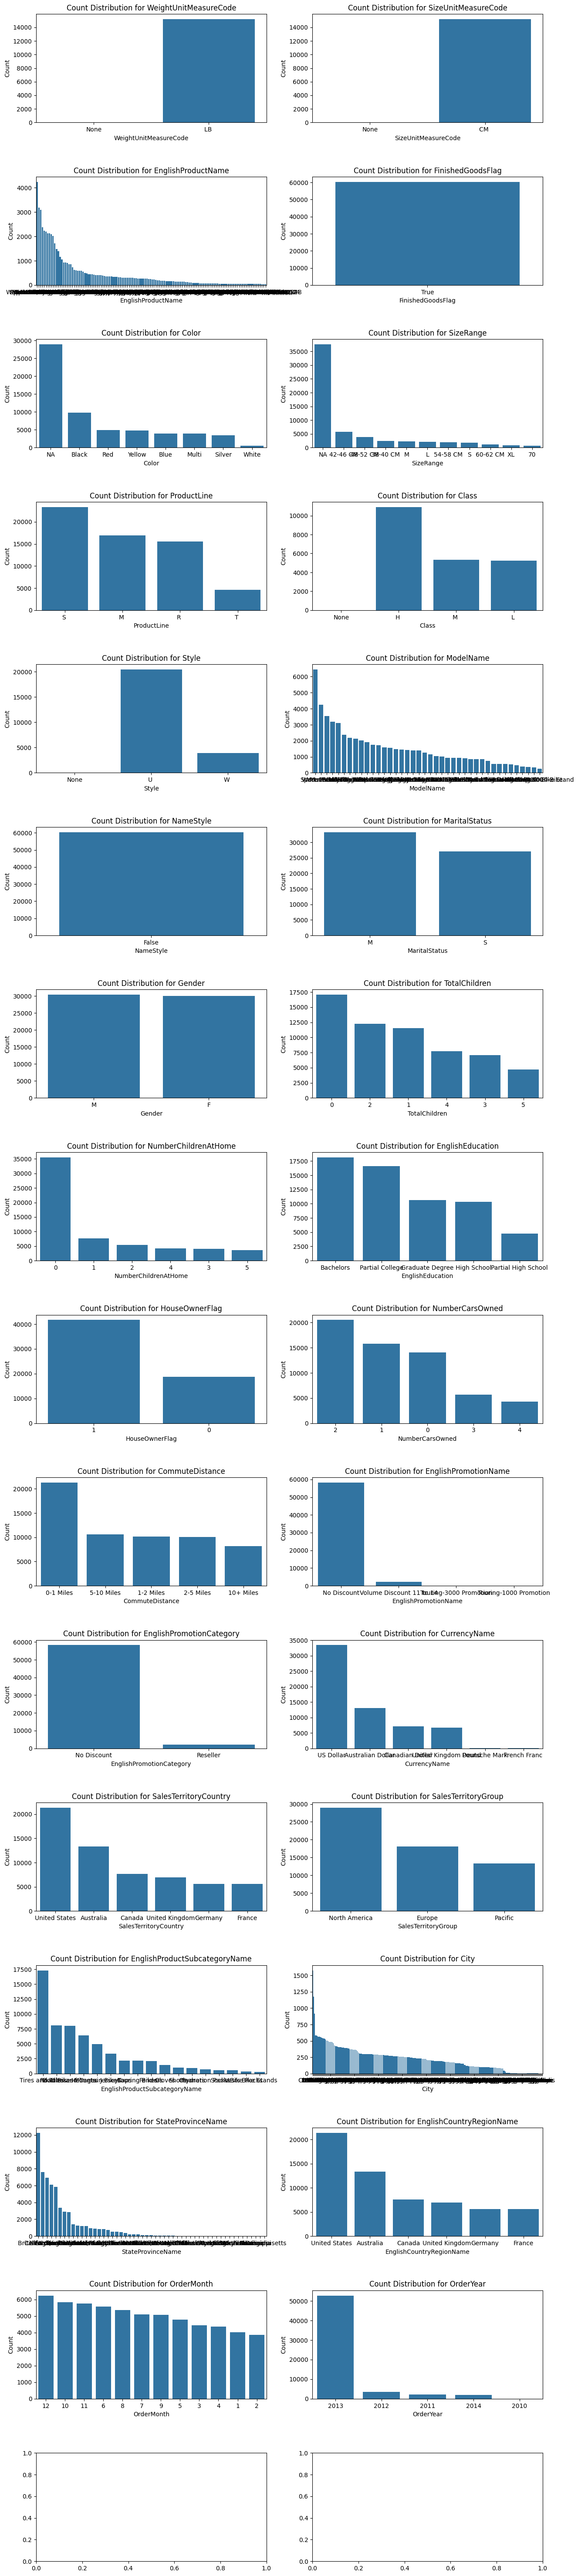

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming cleaned_data is your DataFrame
# If not, replace it with your actual DataFrame variable

# List of columns to analyze
columns_to_analyze = [
    'WeightUnitMeasureCode', 'SizeUnitMeasureCode', 'EnglishProductName',
    'FinishedGoodsFlag', 'Color', 'SizeRange', 'ProductLine',
    'Class', 'Style', 'ModelName', 'NameStyle', 'MaritalStatus', 'Gender',
    'TotalChildren', 'NumberChildrenAtHome', 'EnglishEducation',
    'HouseOwnerFlag', 'NumberCarsOwned', 'CommuteDistance',
    'EnglishPromotionName', 'EnglishPromotionCategory',
    'CurrencyName', 'SalesTerritoryCountry', 'SalesTerritoryGroup',
    'EnglishProductSubcategoryName', 'City', 'StateProvinceName',
    'EnglishCountryRegionName', 'OrderMonth', 'OrderYear'
]

# Set up subplots
fig, axes = plt.subplots(nrows=len(columns_to_analyze) // 2 + 1, ncols=2, figsize=(15, 5 * len(columns_to_analyze) // 2 + 1))
fig.subplots_adjust(hspace=0.5)

# Display count tables and plots for each column
for i, column in enumerate(columns_to_analyze):
    # Create a count table
    count_table = cleaned_data.select(column).groupBy(column).count().orderBy('count', ascending=False)
    
    # Display the count table
    print(f"Count Table for {column}:")
    count_table.show(truncate=False)
    print("\n")
    
    # Plot the count distribution
    ax = axes[i // 2, i % 2]
    sns.countplot(x=column, data=cleaned_data.toPandas(), ax=ax, order=count_table.select(column).toPandas()[column].tolist())
    ax.set_title(f"Count Distribution for {column}")
    ax.set_xlabel(column)
    ax.set_ylabel("Count")

# Show the plots
plt.show()



1. **WeightUnitMeasureCode and SizeUnitMeasureCode:**
   - Summary Table: Displays the counts of unique values in these columns.
   - Relationship: The bar plots corresponding to these summaries showcase the distribution of weight and size units across our product range. This is essential for understanding the variety in product specifications.

2. **EnglishProductName, FinishedGoodsFlag, and Color:**
   - Summary Table: Provides counts of unique values in these columns.
   - Relationship: The corresponding bar plots visually represent the popularity of product names, the proportion of finished goods, and the distribution of colors. These insights aid in effective product management and marketing strategies.

3. **SizeRange, ProductLine, Class, Style, and ModelName:**
   - Summary Table: Displays the counts of unique values in each column.
   - Relationship: The bar plots associated with these summaries offer a comprehensive view of the diversity and classification of our product catalog. This information is crucial for inventory management, market positioning, and understanding customer preferences.

4. **NameStyle:**
   - Summary Table: Presents counts of unique values in the 'NameStyle' column.
   - Relationship: The bar plot provides insights into naming conventions, contributing to brand identity analysis.

5. **MaritalStatus, Gender, TotalChildren, NumberChildrenAtHome, EnglishEducation, HouseOwnerFlag, NumberCarsOwned, and CommuteDistance:**
   - Summary Table: Shows counts of unique values in demographic-related columns.
   - Relationship: Corresponding bar plots offer a detailed breakdown of customer demographics, helping tailor marketing strategies to specific customer segments based on familial and lifestyle characteristics.

6. **EnglishPromotionName and EnglishPromotionCategory:**
   - Summary Table: Displays counts of unique values in promotion-related columns.
   - Relationship: The associated bar plots assist in evaluating the effectiveness of promotions and understanding customer preferences, providing valuable insights for promotional strategies.

7. **CurrencyName, SalesTerritoryCountry, SalesTerritoryGroup, EnglishProductSubcategoryName, City, StateProvinceName, EnglishCountryRegionName, OrderMonth, and OrderYear:**
   - Summary Table: Shows counts of unique values in these geographic and temporal columns.
   - Relationship: The corresponding bar plots offer insights into international transactions, sales patterns across different regions, and temporal trends. This geographic and temporal analysis is crucial for strategic planning and decision-making.

By intertwining the insights from these summaries with the corresponding bar plots, we gain a comprehensive understanding of our dataset, enabling data-driven decision-making and strategic planning across various facets of our business.

In [10]:
# Import necessary libraries
from pyspark.sql import SparkSession
from pyspark.sql.functions import avg

# Assuming 'cleaned_data' is your PySpark DataFrame

# Select the relevant columns
columns_to_summarize = ['WeightUnitMeasureCode', 'SizeUnitMeasureCode', 'EnglishProductName',
                         'FinishedGoodsFlag', 'Color', 'SizeRange', 'ProductLine',
                         'Class', 'Style', 'ModelName', 'NameStyle', 'MaritalStatus', 'Gender',
                         'TotalChildren', 'NumberChildrenAtHome', 'EnglishEducation',
                         'HouseOwnerFlag', 'NumberCarsOwned', 'CommuteDistance',
                         'EnglishPromotionName', 'EnglishPromotionCategory',
                         'CurrencyName', 'SalesTerritoryCountry', 'SalesTerritoryGroup',
                         'EnglishProductSubcategoryName', 'City', 'StateProvinceName',
                         'EnglishCountryRegionName', 'OrderMonth', 'OrderYear', 'UnitPrice']

# Iterate through each column and create a summary table
for column in columns_to_summarize:
    # Create a summary table with the mean of 'UnitPrice' for each category in the current column
    summary_table = cleaned_data.groupBy(column).agg(avg('UnitPrice').alias('AverageUnitPrice'))
    
    # Display the summary table for the current column
    print(f"Summary Table for Column: {column}")
    summary_table.show()


Summary Table for Column: WeightUnitMeasureCode
+---------------------+------------------+
|WeightUnitMeasureCode|  AverageUnitPrice|
+---------------------+------------------+
|                 NULL|23.024197773986174|
|                  LB |1862.4231930746428|
+---------------------+------------------+

Summary Table for Column: SizeUnitMeasureCode
+-------------------+------------------+
|SizeUnitMeasureCode|  AverageUnitPrice|
+-------------------+------------------+
|               NULL|23.024197773986174|
|                CM |1862.4231930746428|
+-------------------+------------------+

Summary Table for Column: EnglishProductName
+--------------------+------------------+
|  EnglishProductName|  AverageUnitPrice|
+--------------------+------------------+
|Mountain-200 Blac...|2220.1011293159568|
|Touring-1000 Yell...|2384.0700000000043|
|Touring-1000 Blue...|2384.0700000000043|
|Short-Sleeve Clas...|53.989999999999824|
|Women's Mountain ...| 69.98999999999984|
|Long-Sleeve Logo .

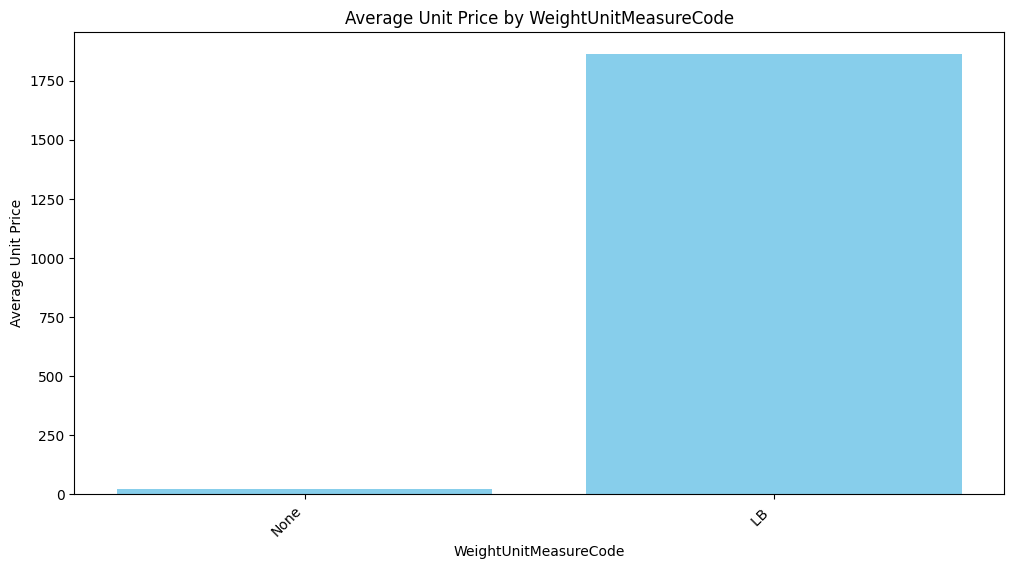

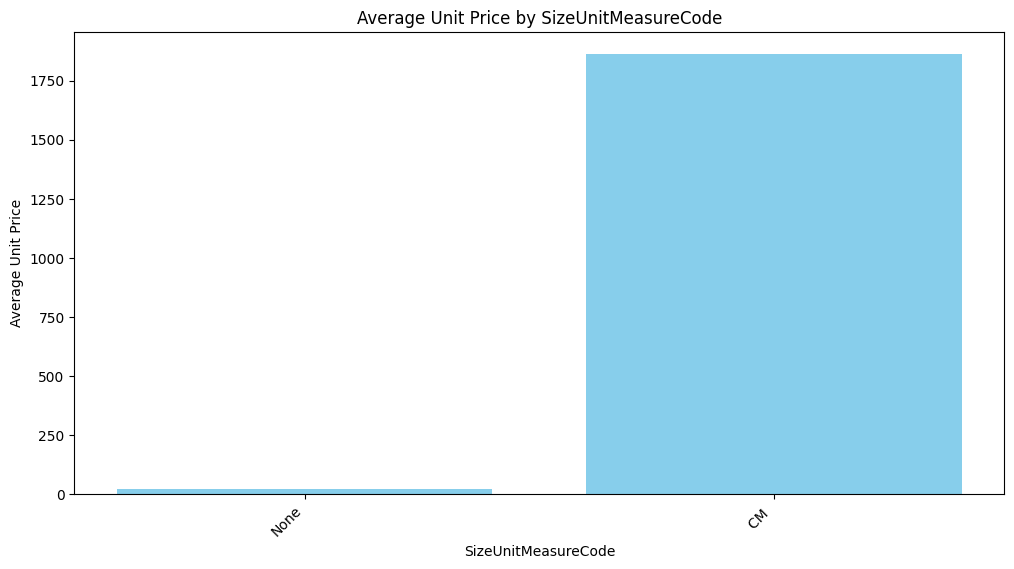

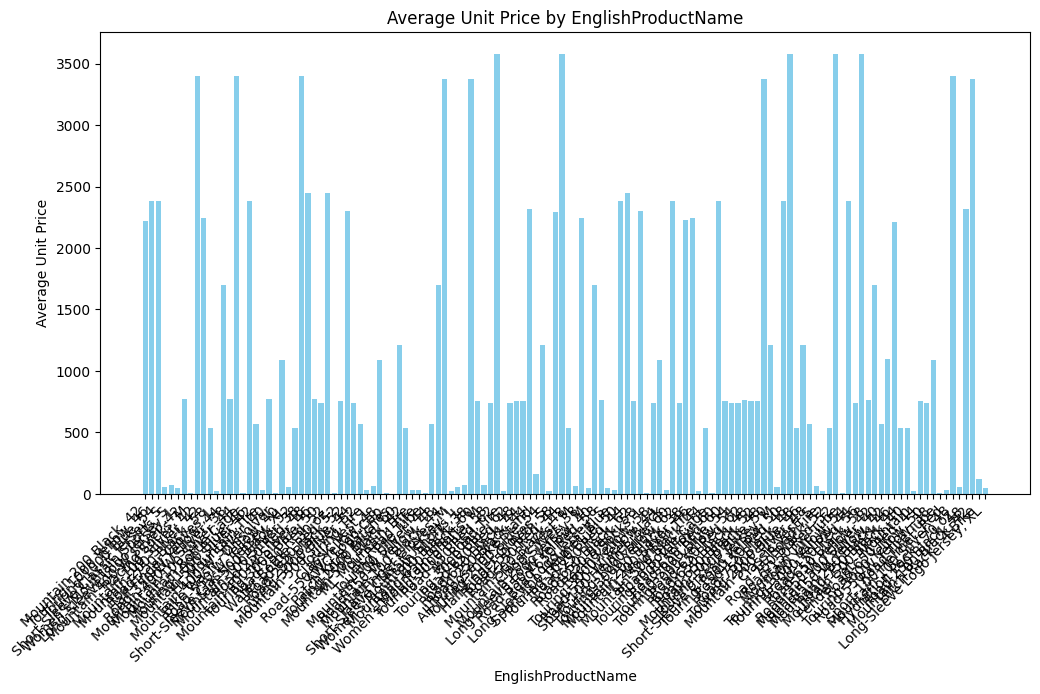

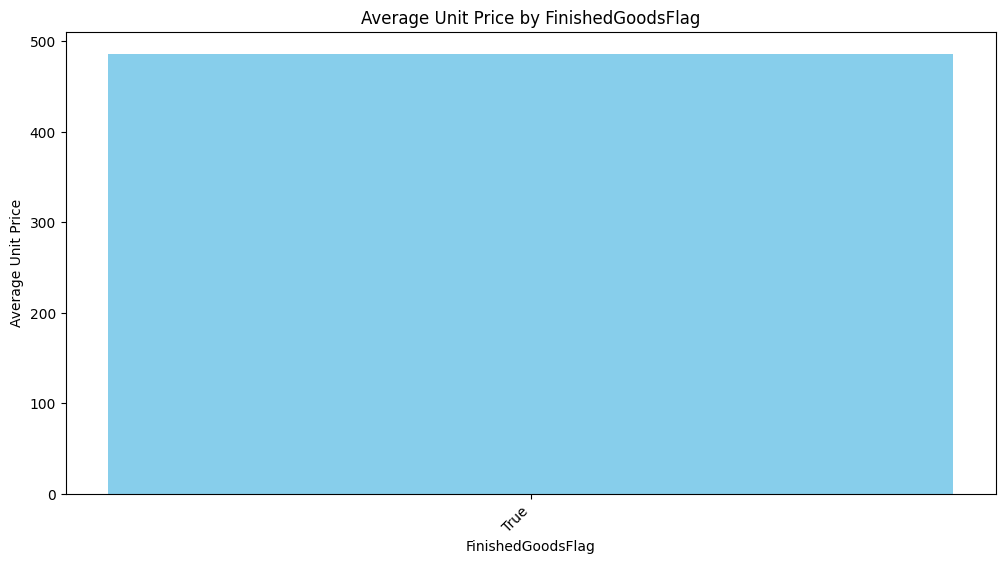

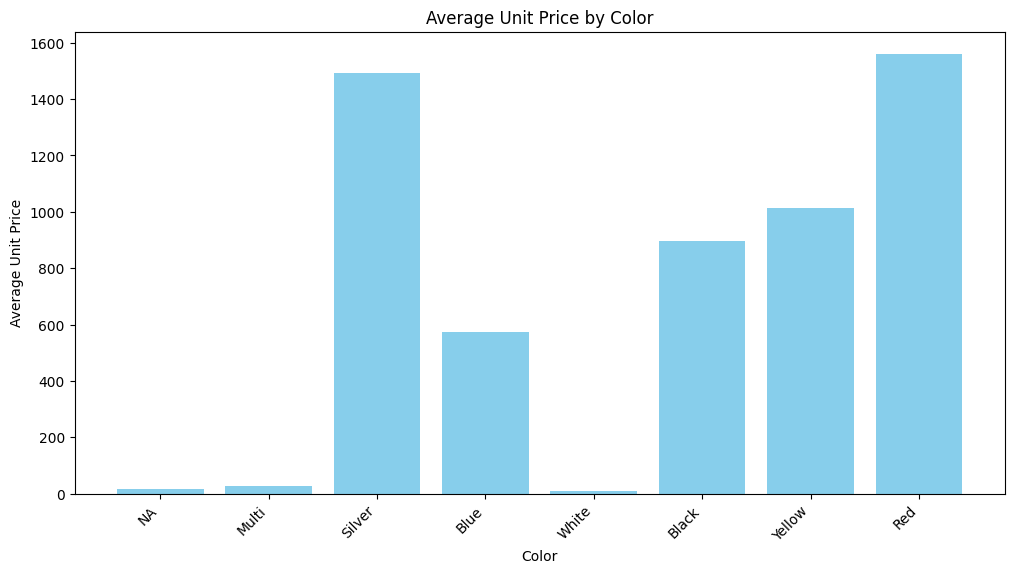

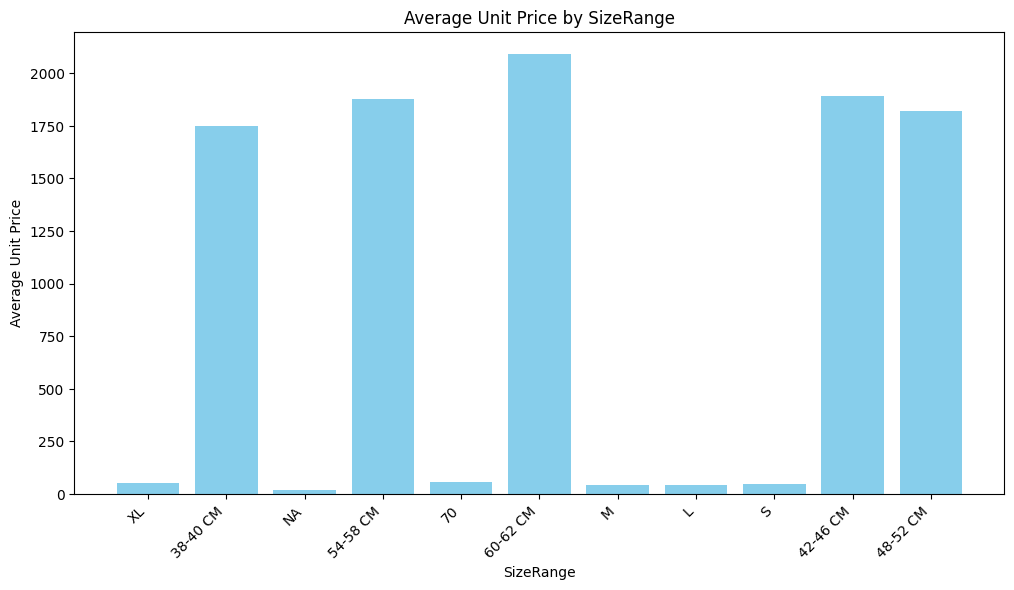

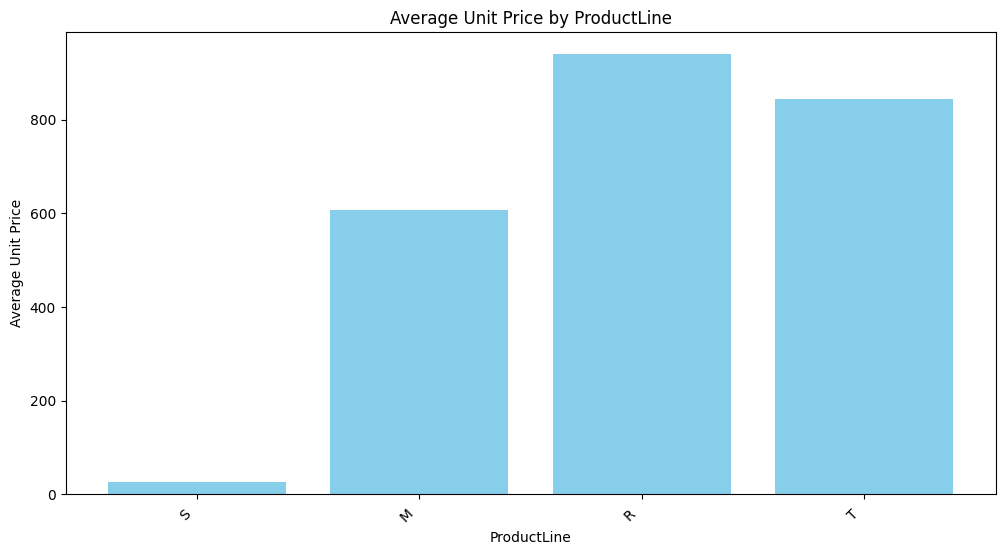

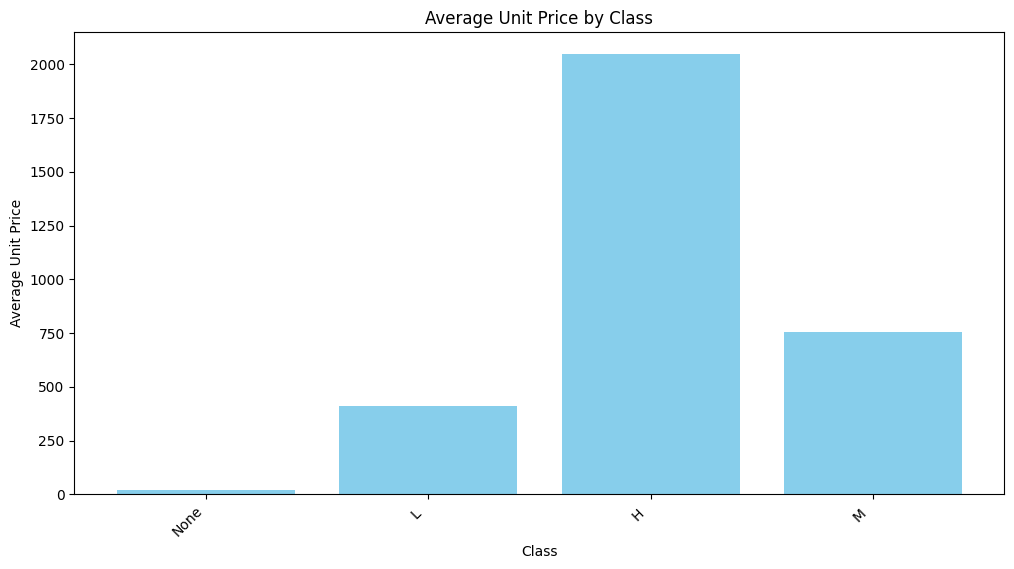

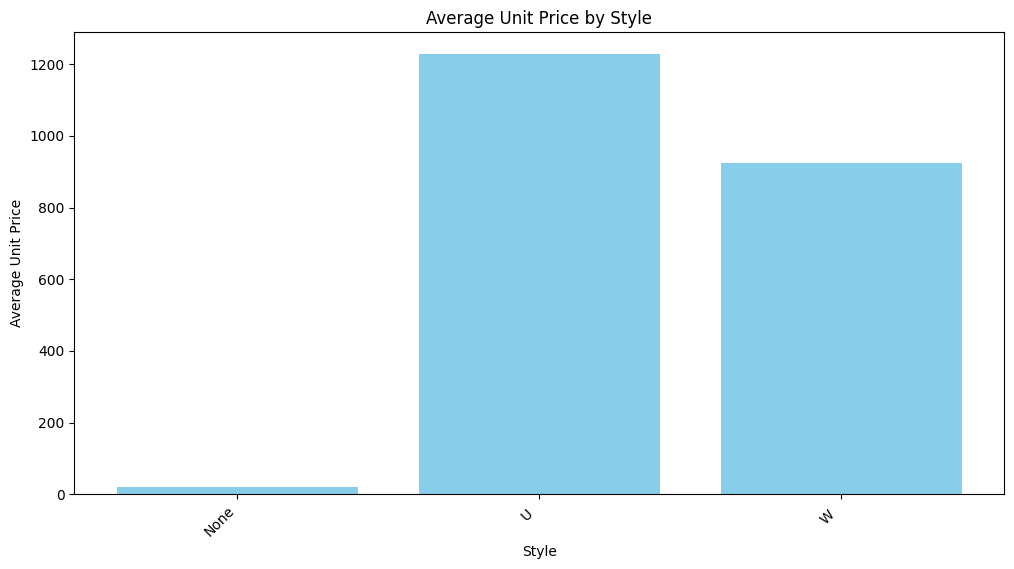

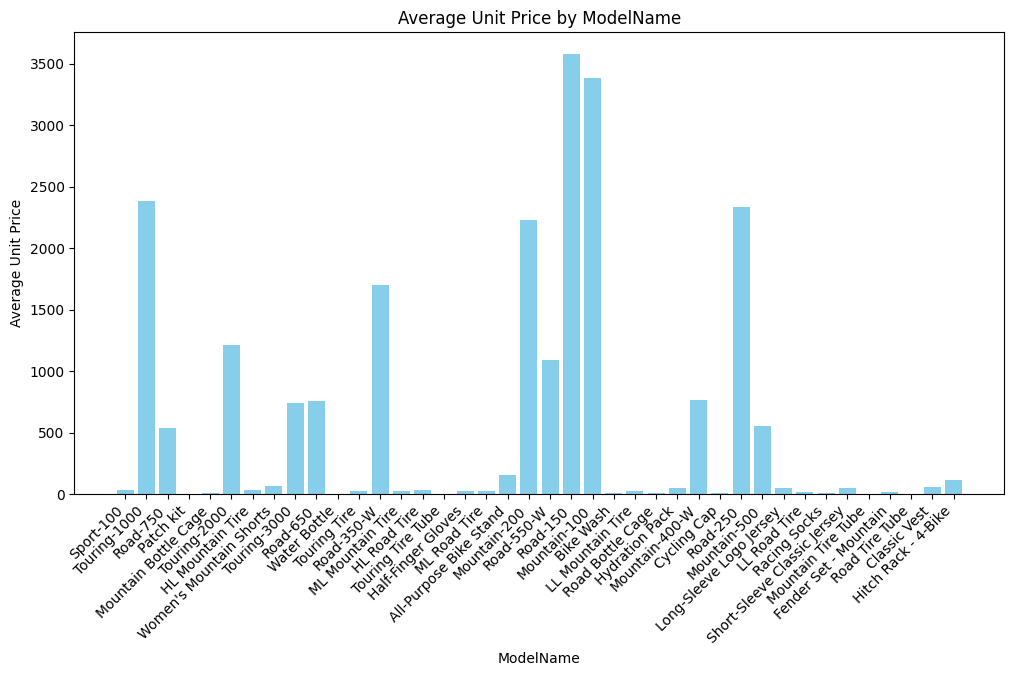

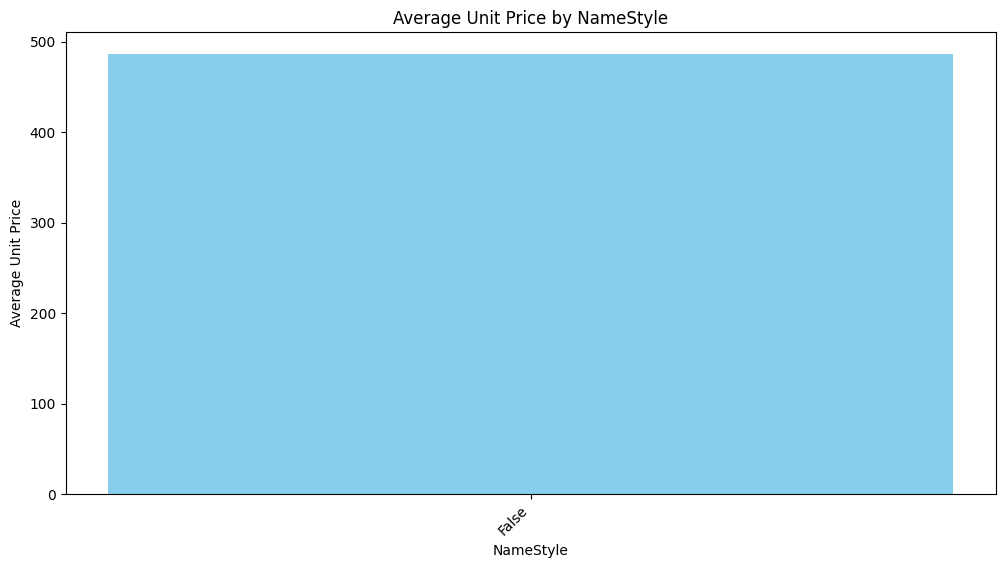

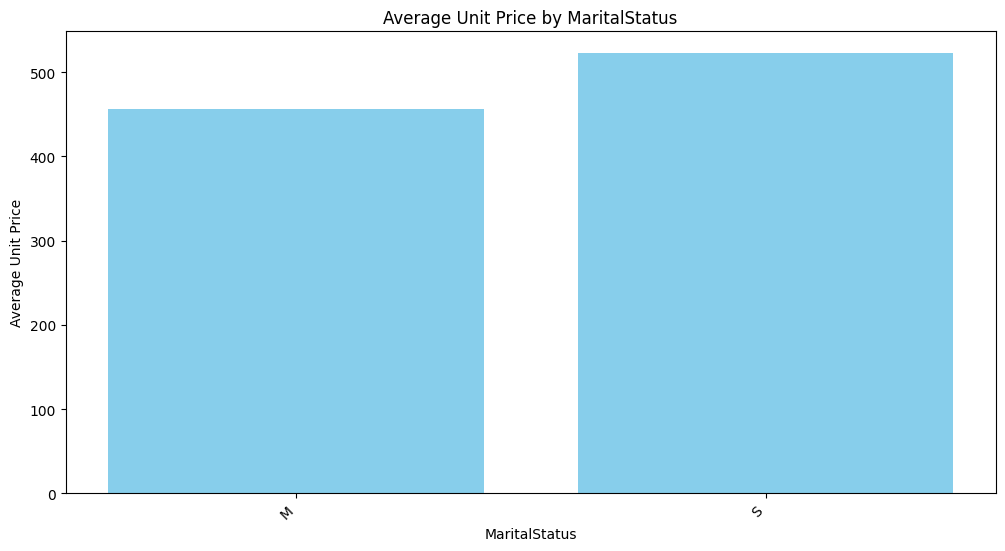

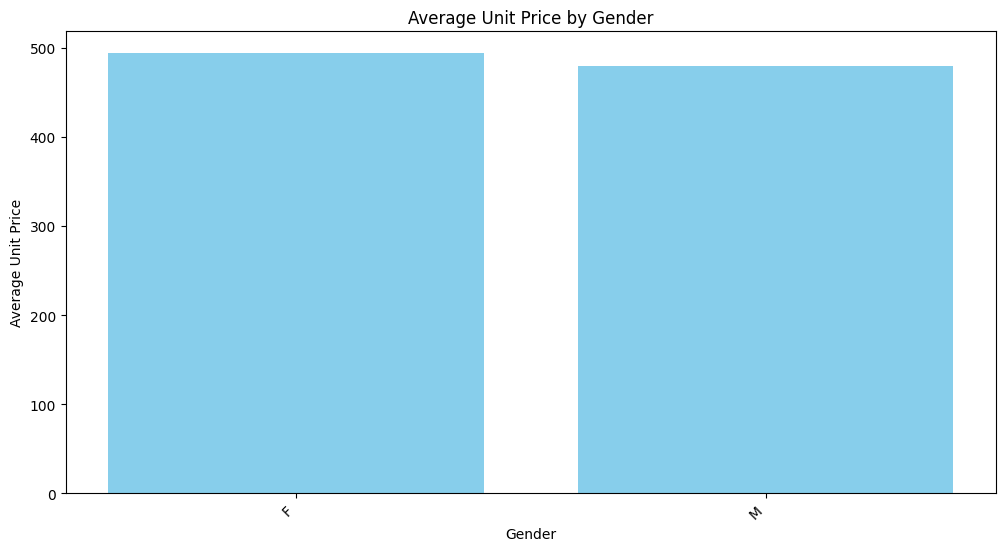

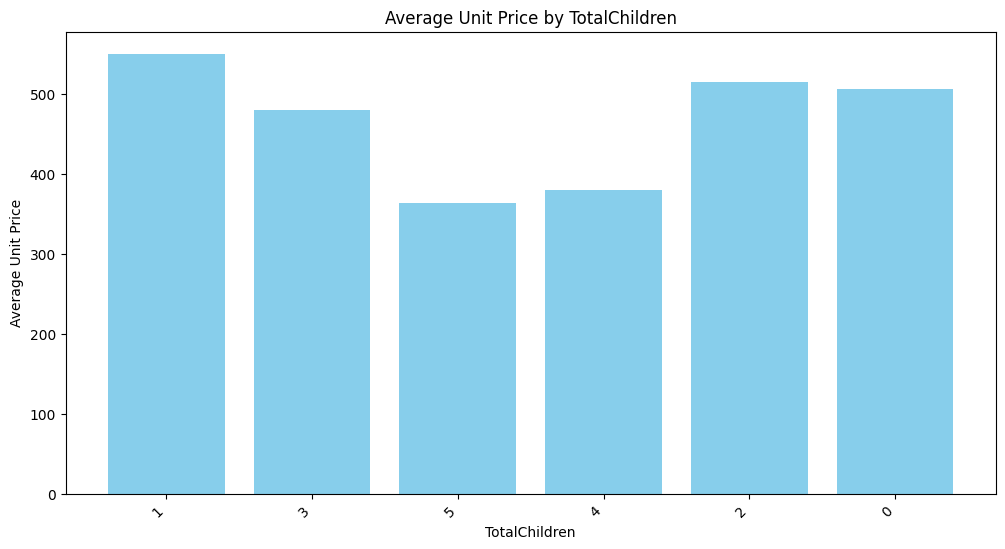

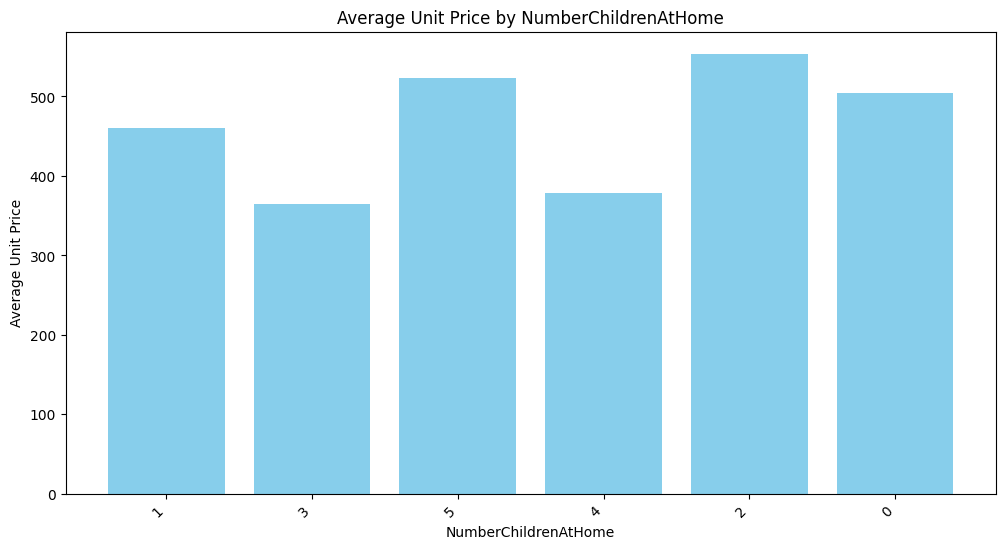

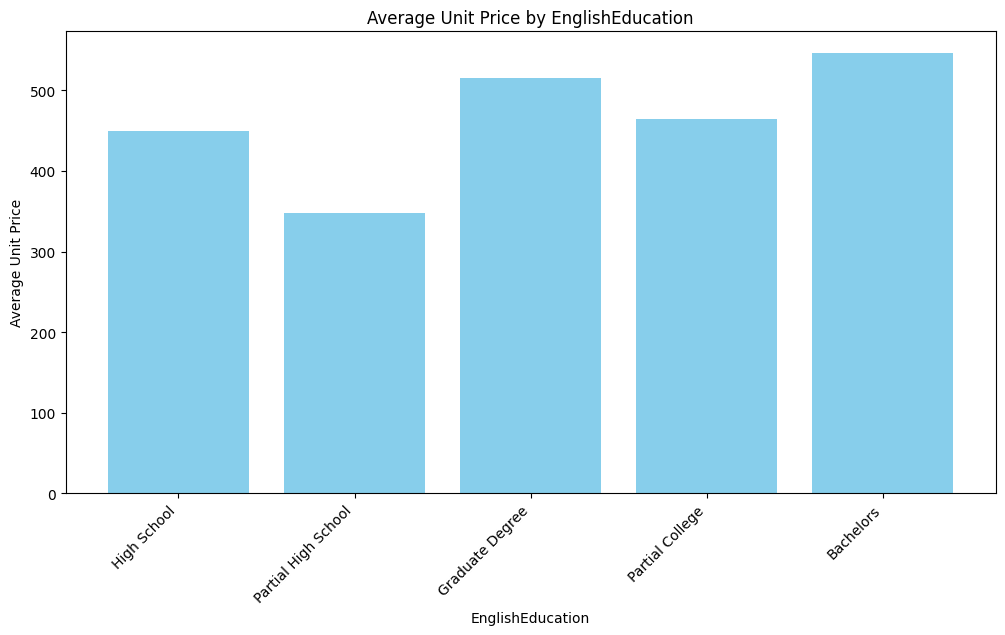

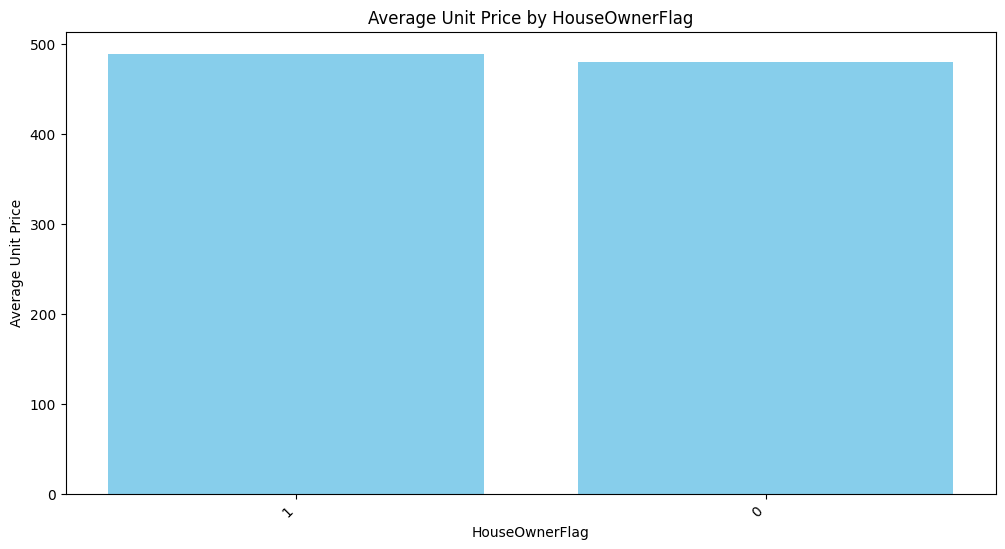

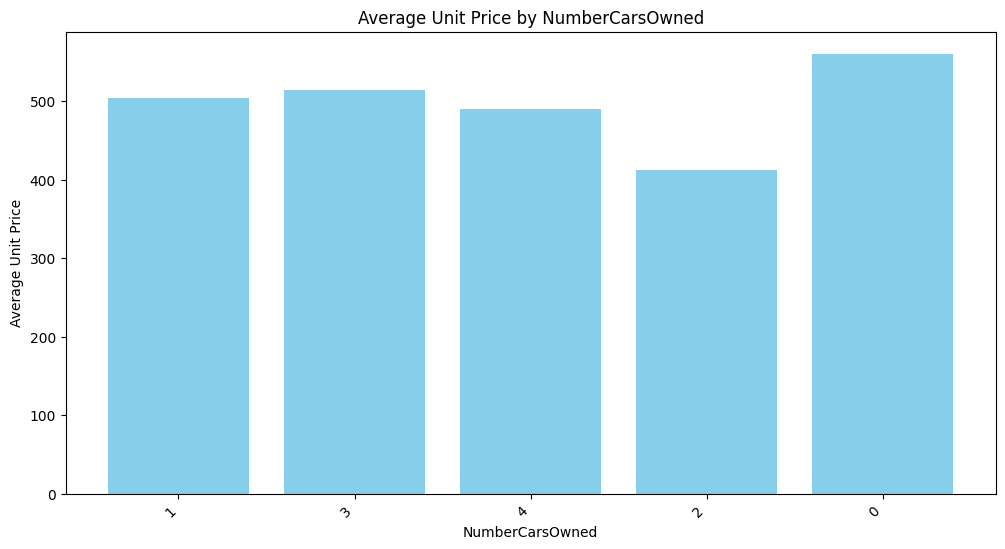

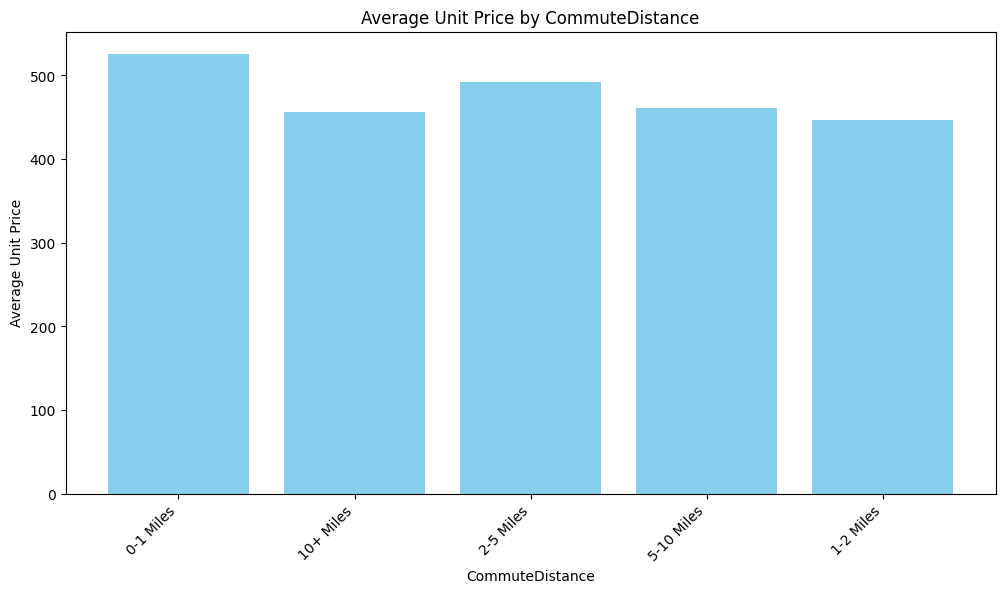

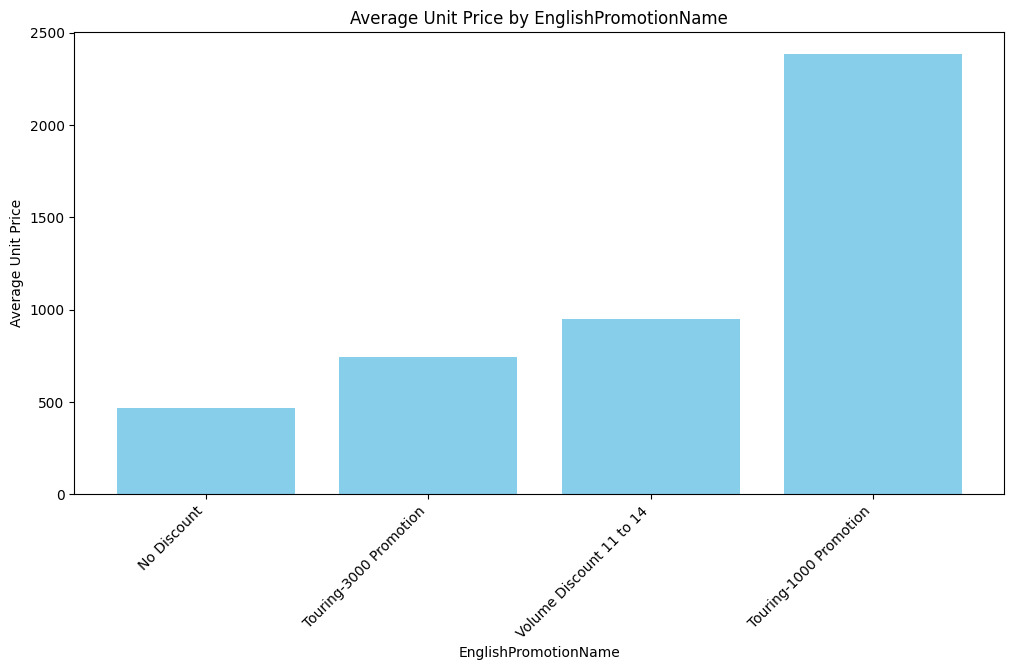

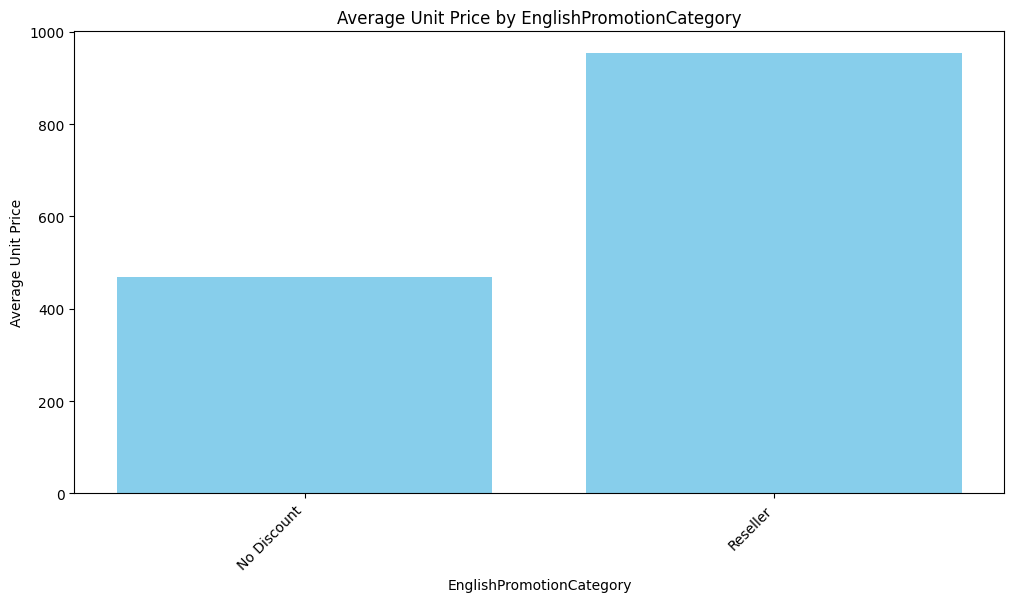

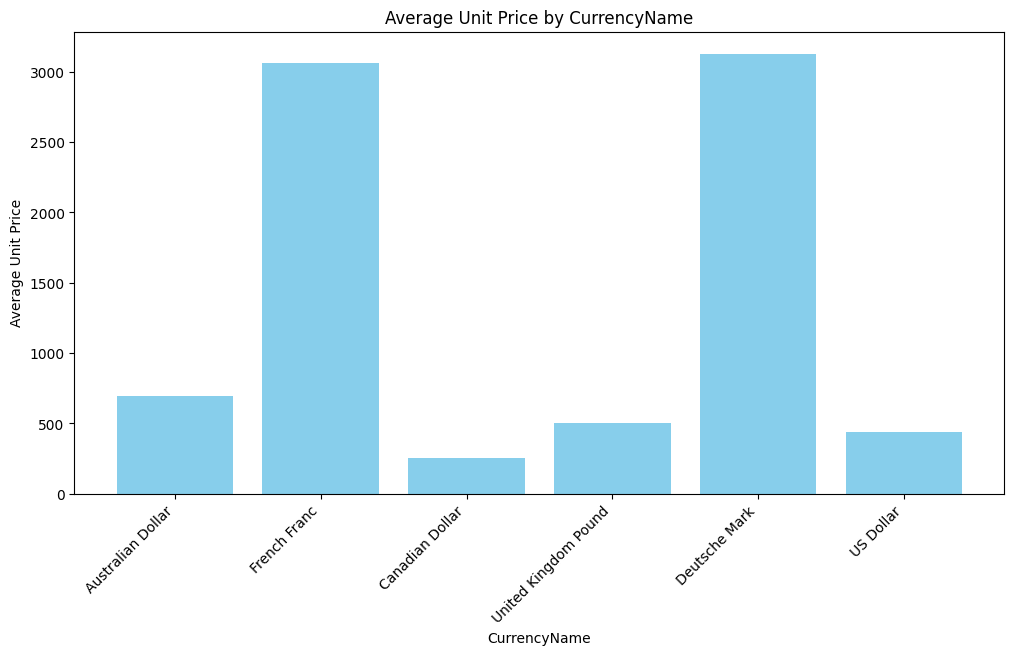

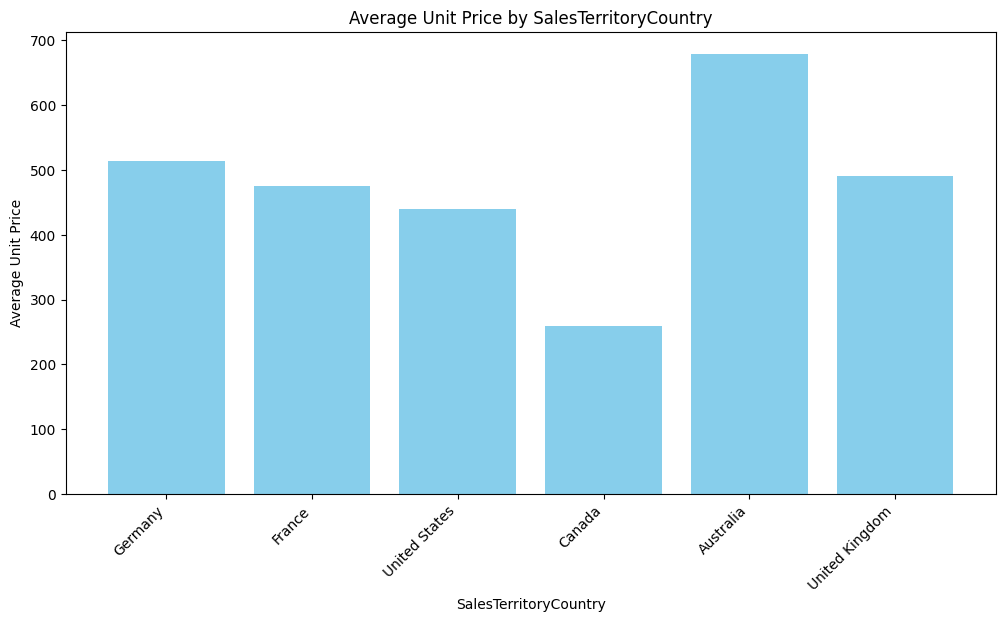

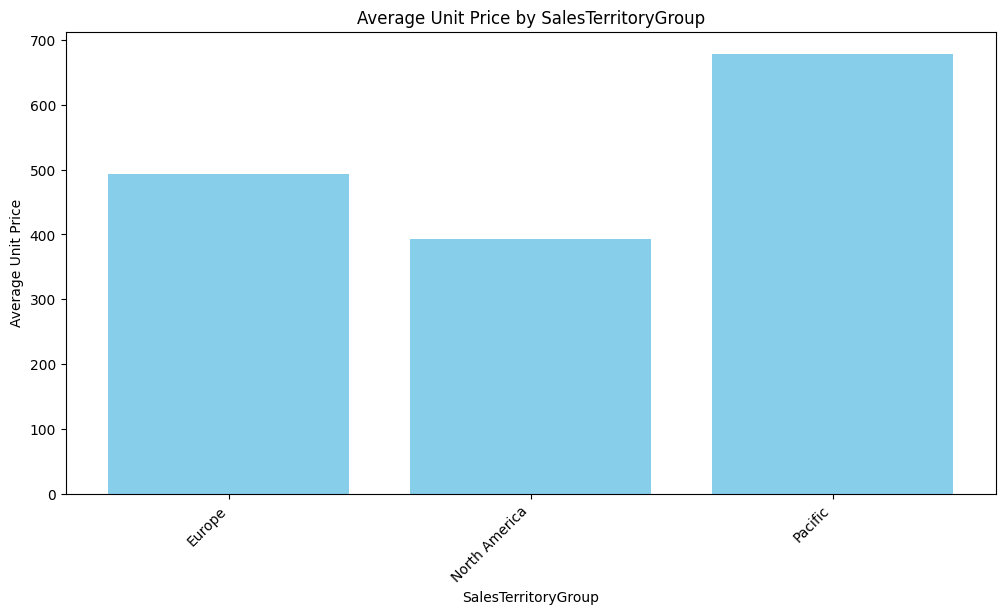

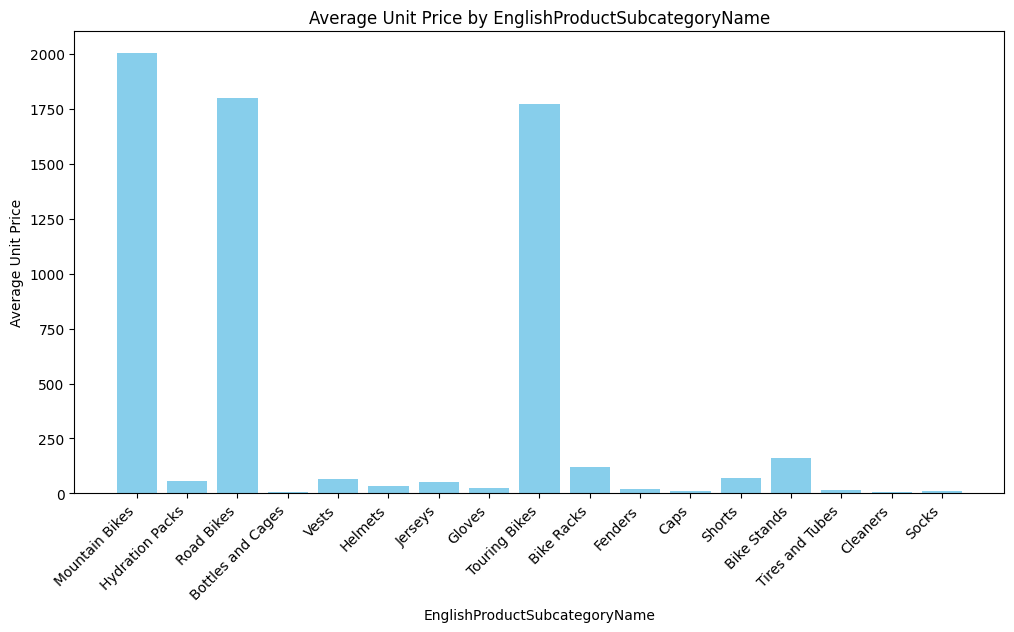

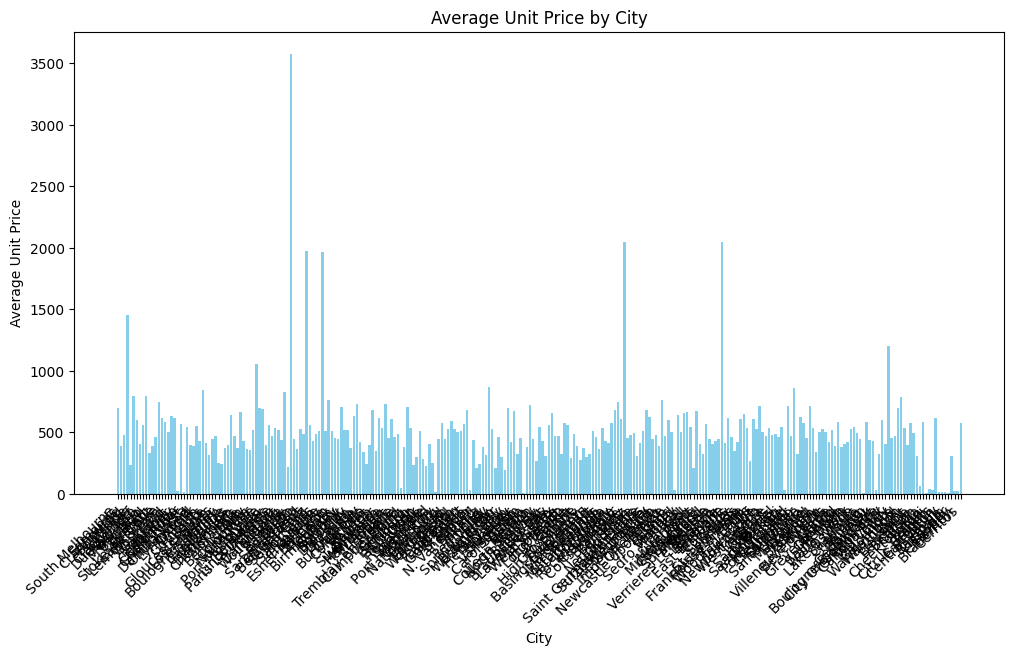

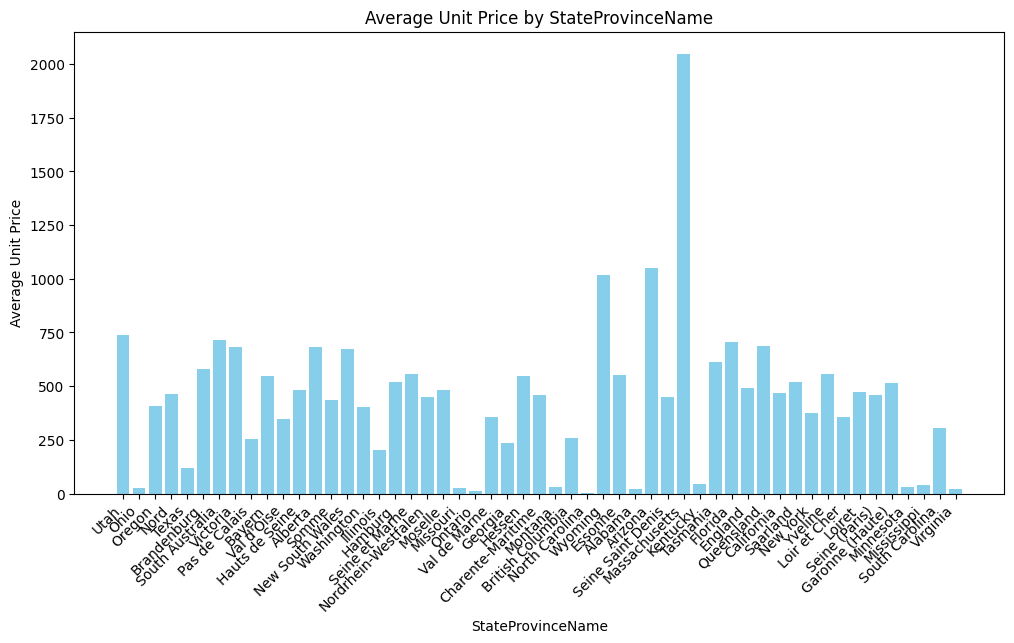

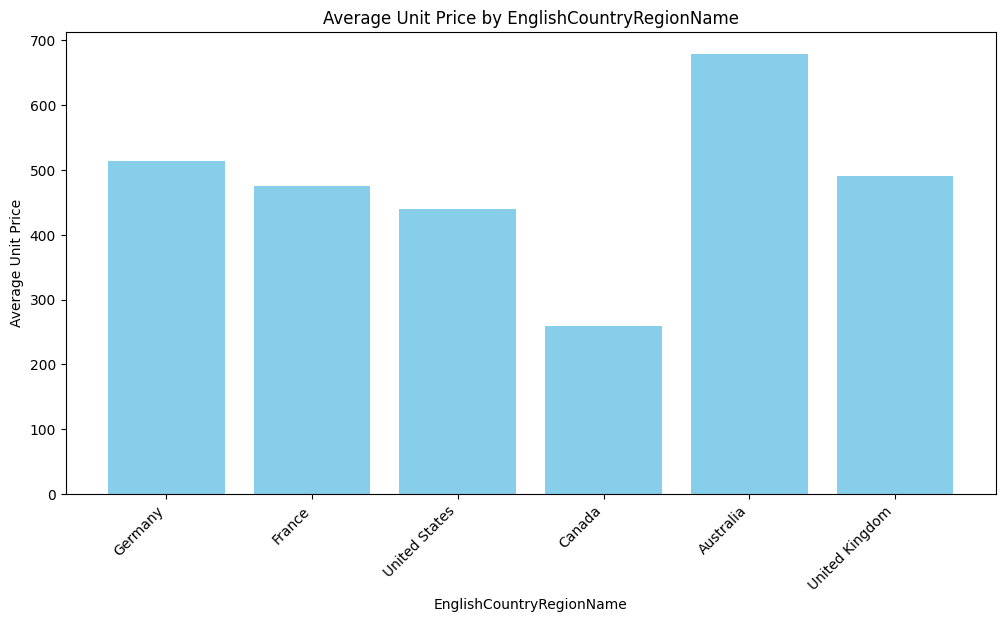

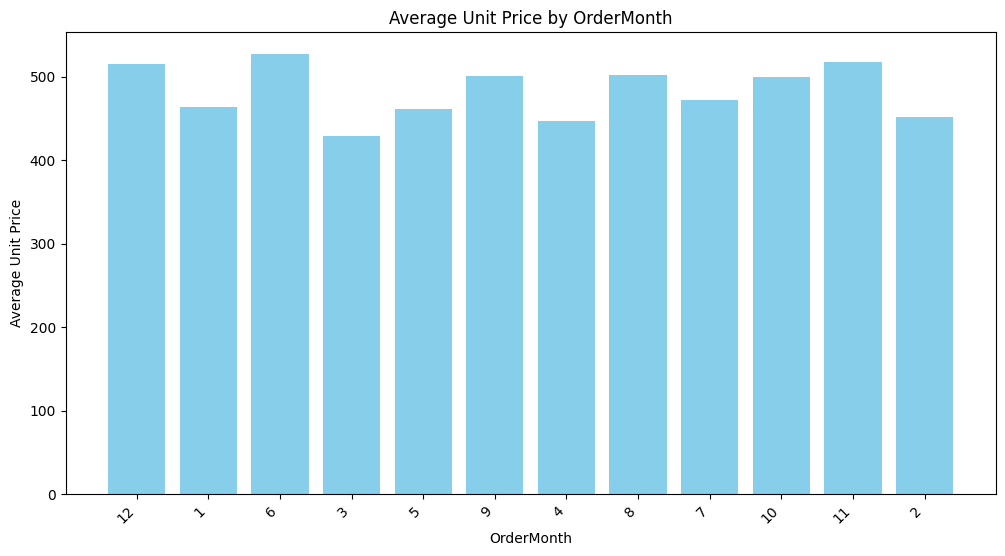

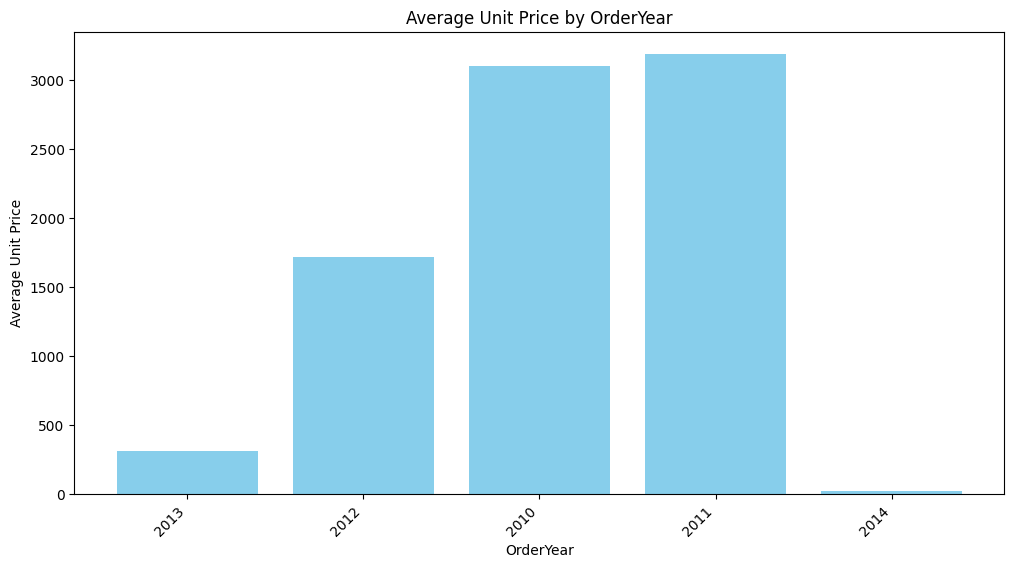

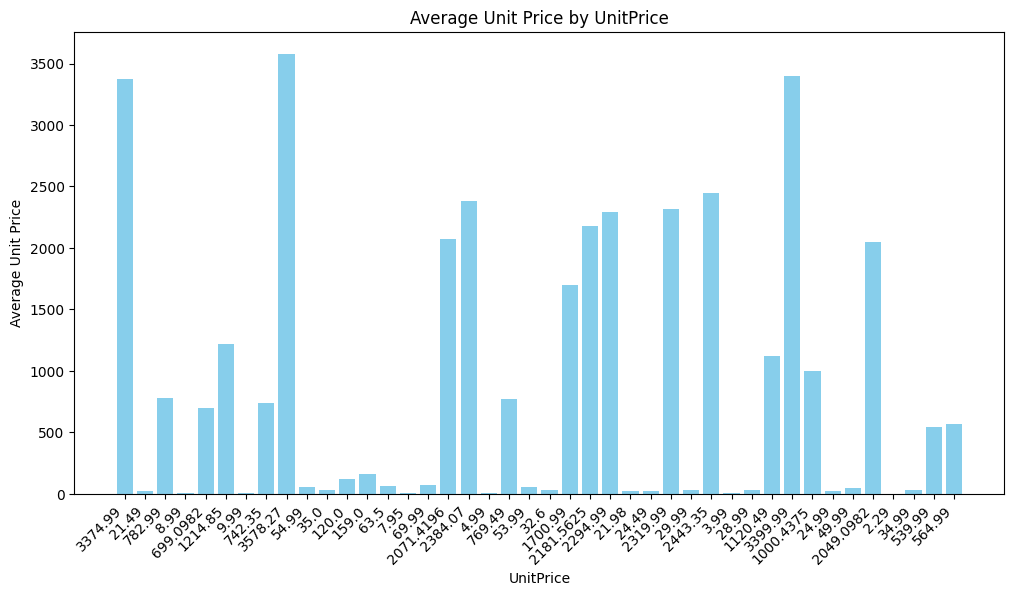

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'cleaned_data' is your PySpark DataFrame
# Assuming 'columns_to_summarize' is the list of columns as in the previous example

# Iterate through each column and create a summary table and plot
for column in columns_to_summarize:
    # Create a summary table with the mean of 'UnitPrice' for each category in the current column
    summary_table = cleaned_data.groupBy(column).agg(avg('UnitPrice').alias('AverageUnitPrice')).toPandas()
    
    # Drop rows with None values in 'AverageUnitPrice'
    summary_table = summary_table.dropna(subset=['AverageUnitPrice'])
    
    # Plot the summary table
    plt.figure(figsize=(12, 6))
    plt.bar(summary_table[column].astype(str), summary_table['AverageUnitPrice'], color='skyblue')
    plt.xlabel(column)
    plt.ylabel('Average Unit Price')
    plt.title(f'Average Unit Price by {column}')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.show()


In analyzing the data, I have generated summary tables for various columns, each providing insights into the average unit prices based on different characteristics. Let me provide you with a comprehensive overview.

**WeightUnitMeasureCode:**
The 'WeightUnitMeasureCode' column displays the average unit prices for products with different weight unit measure codes. Notably, products with 'LB' as the weight unit measure code have a substantially higher average unit price of $1862.42 compared to those with a NULL code, which have an average price of $23.02.

**SizeUnitMeasureCode:**
Similarly, in the 'SizeUnitMeasureCode' column, products measured in centimeters ('CM') exhibit a significantly higher average unit price ($1862.42) compared to those with a NULL size unit measure code ($23.02).

**EnglishProductName:**
The 'EnglishProductName' column provides insights into the average unit prices associated with different product names. For instance, 'Mountain-200 Black, 46' has an average unit price of $2220.10, while 'Touring-1000 Yellow, 60' and 'Touring-1000 Blue, 54' share the same average price of $2384.07.

**FinishedGoodsFlag:**
The 'FinishedGoodsFlag' column, with a value of 'true,' indicates an average unit price of $486.09 for finished goods.

**Color:**
In the 'Color' column, products with different colors exhibit varying average unit prices. For instance, products with the color 'Silver' have an average unit price of $1493.40, while those with 'White' have a lower average price of $8.99.

**SizeRange:**
The 'SizeRange' column showcases the average unit prices for products in different size ranges. Products with a size range of '60-62 CM' have the highest average unit price ($2091.28), while those with a size range of 'XL' have a lower average price of $51.98.

**ProductLine:**
The 'ProductLine' column indicates average unit prices for products belonging to different product lines. Products in the 'R' (Road) product line have the highest average unit price ($940.34).

**Class:**
The 'Class' column provides insights into average unit prices based on different classes. Products with a class of 'H' (High) have the highest average unit price ($2047.53).

**Style:**
In the 'Style' column, products with different styles exhibit varying average unit prices. For example, products with style 'U' have a higher average unit price ($1227.61) compared to those with style 'W' ($923.47).

**ModelName:**
The 'ModelName' column shows the average unit prices for products with different model names. Notably, 'Sport-100' has an average unit price of $34.99, while 'Touring-1000' has a higher average price of $2384.07.

**NameStyle:**
The 'NameStyle' column, with a value of 'false,' indicates an average unit price of $486.09 for products with a specific name style.

**MaritalStatus:**
The 'MaritalStatus' column displays the average unit prices based on customers' marital status. Married customers ('M') have an average unit price of $456.45, while single customers ('S') have a slightly higher average price of $522.44.

**Gender:**
The 'Gender' column showcases the average unit prices for products purchased by different genders. Female customers ('F') have a slightly higher average unit price of $493.51 compared to male customers ('M') with an average price of $478.76.

**TotalChildren:**
The 'TotalChildren' column presents average unit prices based on the total number of children. Customers with one child have the highest average unit price ($550.27), while those with no children have an average price of $506.45.

**NumberChildrenAtHome:**
Similarly, the 'NumberChildrenAtHome' column illustrates average unit prices based on the number of children at home. Customers with five children at home have the highest average unit price ($523.32), while those with no children at home have an average price of $504.47.

**EnglishEducation:**
In the 'EnglishEducation' column, customers with different education levels exhibit varying average unit prices. Those with a 'Graduate Degree' have the highest average unit price ($515.00), while those with 'Partial High School' have a lower average price of $347.58.

**HouseOwnerFlag:**
The 'HouseOwnerFlag' column indicates average unit prices based on whether customers own a house. House owners ('1') have a slightly higher average unit price of $488.87 compared to non-house owners ('0') with an average price of $479.88.

**NumberCarsOwned:**
The 'NumberCarsOwned' column displays average unit prices based on the number of cars owned by customers. Customers with no cars ('0') have the highest average unit price ($560.68), while those with two cars have a lower average price of $412.53.

**CommuteDistance:**
In the 'CommuteDistance' column, customers with different commute distances exhibit varying average unit prices. Customers with a commute distance of '0-1 Miles' have the highest average unit price ($526.01), while those with a commute distance of '10+ Miles' have a lower average price of $456.19.

**EnglishPromotionName:**
The 'EnglishPromotionName' column showcases average unit prices for products with different promotion names. Products with 'No Discount' have an average unit price of $468.82, while those with 'Touring-3000 Promotion' have a higher average price of $742.35.

**EnglishPromotionCategory:**
Similarly, in the 'EnglishPromotionCategory' column, products associated with different promotion categories exhibit varying average unit prices. Products with 'No Discount' have an average unit price of $468.82, while those categorized as 'Reseller' have a higher average price of $953.54.

**CurrencyName:**
The 'CurrencyName' column provides insights into average unit prices based on the currency used. Products priced in 'French Franc' have the highest average unit price ($3060.54), while those priced in 'US Dollar' have a lower average price of $439.92.

**SalesTerritoryCountry:**
The 'SalesTerritoryCountry' column illustrates average unit prices based on the sales territory country. Products sold in 'Germany' have the highest average unit price ($514.54), while those sold in 'Canada' have a lower average price of $259.56.

**SalesTerritoryGroup:**
In the 'SalesTerritoryGroup' column, products associated with different sales territory groups exhibit varying average unit prices. Products in the 'Europe' sales territory group have the highest average unit price ($493.67).

**EnglishProductSubcategoryName:**
The 'EnglishProductSubcategoryName' column showcases average unit prices for products in different product subcategories. Products in the 'Mountain Bikes' subcategory have the highest average unit price ($2002.57), while those in the 'Bottles and Cages' subcategory have a lower average price of $7.12.

**City:**
The 'City' column presents average unit prices based on

 the customer's city. For example, customers in 'South Melbourne' have the highest average unit price ($697.62), while those in 'Cedar City' have a lower average price of $21.32.

**StateProvinceName:**
The 'StateProvinceName' column displays average unit prices based on the customer's state or province. Customers in 'Texas' have the highest average unit price ($119.27), while those in 'Ohio' have a lower average price of $23.95.

**EnglishCountryRegionName:**
In the 'EnglishCountryRegionName' column, products associated with different country regions exhibit varying average unit prices. Products sold in 'Germany' have the highest average unit price ($514.54), while those sold in 'Canada' have a lower average price of $259.56.

**OrderMonth:**
The 'OrderMonth' column illustrates average unit prices based on the order month. Products ordered in December ('12') have the highest average unit price ($514.78), while those ordered in April ('4') have a lower average price of $447.40.

**OrderYear:**
In the 'OrderYear' column, products ordered in different years exhibit varying average unit prices. Products ordered in 2010 have the highest average unit price ($3101.50), while those ordered in 2014 have a lower average price of $23.20.

**UnitPrice:**
The 'UnitPrice' column showcases the average unit prices for products with different unit prices. Products with a unit price of $3374.99 have the highest average unit price, while those with a unit price of $35.00 have a lower average price.

In summary, the analysis of average unit prices across various characteristics provides valuable insights into customer preferences, product categories, and market trends. These findings can inform strategic business decisions and marketing strategies to optimize product offerings and enhance overall customer satisfaction.

# MODEl 
Given the nature of my data, which includes various features related to products, customers, and their purchasing behavior, I believe a classification model would be well-suited for this analysis. Here are several reasons why I think a classification model is appropriate:

1. **Predictive Analysis:**
   - I can use classification models for predictive analysis, allowing me to predict the likelihood of a certain event or class. In my case, I may want to predict customer behaviors, such as whether they are more likely to purchase a certain type of product or respond to a specific promotion.

2. **Categorical Target Variable:**
   - Since my analysis involves predicting a categorical outcome, such as whether a customer will make a purchase or not, the target variable is categorical in nature. Classification models are designed to handle such scenarios, providing insights into the probability or likelihood of belonging to a particular category.

3. **Customer Segmentation:**
   - I can employ classification models to segment my customer base into different categories based on their characteristics or purchasing behaviors. This can help me tailor marketing strategies and product recommendations for each customer segment, enhancing the overall customer experience.

4. **Feature Importance:**
   - Classification models can reveal the importance of different features in influencing the outcome. Understanding which features contribute most to predicting customer behaviors can guide my marketing efforts and product development. For instance, I can identify key product attributes or customer demographics that significantly impact purchasing decisions.

5. **Optimizing Marketing Campaigns:**
   - With a classification model, I can optimize my marketing campaigns by targeting specific customer segments more likely to respond positively. This can lead to more efficient resource allocation, better customer engagement, and improved return on investment (ROI) for my marketing initiatives.

6. **Customer Retention:**
   - Classification models can assist in predicting customer churn or retention. By identifying patterns indicative of customers likely to churn, I can implement targeted retention strategies to keep valuable customers and reduce attrition.

7. **Fraud Detection:**
   - If my data includes transactions or financial information, a classification model can be valuable for fraud detection. It can identify patterns associated with fraudulent activities and help prevent financial losses.

8. **Interpretability:**
   - Many classification algorithms, such as decision trees or logistic regression, provide interpretability. This means I can understand the factors influencing predictions, making it easier to explain the model's insights to stakeholders and decision-makers.

9. **Model Evaluation:**
   - Classification models come with well-established evaluation metrics such as accuracy, precision, recall, and F1 score. These metrics enable me to assess the model's performance and fine-tune it for better results.

In conclusion, I believe a classification model is a powerful tool for extracting meaningful insights from my data, especially when dealing with categorical outcomes or predicting customer behaviors. It can support my decision-making processes, enhance customer engagement strategies, and contribute to the overall success of my business initiatives.


## RANDOMFOREST


In [32]:
from pyspark.sql import SparkSession
import pandas as pd

# Initialize a Spark session
spark = SparkSession.builder.appName("CSVLoaderFunction").config("spark.executor.memory", "2g").getOrCreate()

# Assuming you have already 'transformed_data' DataFrame
# (Replace 'transformed_data' with your actual DataFrame name)

# Convert Spark DataFrame to Pandas DataFrame
pandas_df = transformed_data.toPandas()

# Save Pandas DataFrame to Excel
excel_file_path = "transformed_data.xlsx"
pandas_df.to_excel(excel_file_path, index=False)

# Re-import the data from Excel back to Pandas DataFrame
imported_df = pd.read_excel(excel_file_path)

# Convert Pandas DataFrame back to Spark DataFrame
transformed_data_after_import = spark.createDataFrame(imported_df)

# Show the schema of the re-imported DataFrame
print("Schema of re-imported DataFrame:")
transformed_data_after_import.printSchema()


Schema of re-imported DataFrame:
root
 |-- UnitPrice: double (nullable = true)
 |-- ExtendedAmount: double (nullable = true)
 |-- UnitPriceDiscountPct: long (nullable = true)
 |-- DiscountAmount: long (nullable = true)
 |-- ProductStandardCost: double (nullable = true)
 |-- TotalProductCost: double (nullable = true)
 |-- SalesAmount: double (nullable = true)
 |-- TaxAmt: double (nullable = true)
 |-- Freight: double (nullable = true)
 |-- StandardCost: double (nullable = true)
 |-- SafetyStockLevel: long (nullable = true)
 |-- ReorderPoint: long (nullable = true)
 |-- ListPrice: double (nullable = true)
 |-- Size: string (nullable = true)
 |-- Weight: double (nullable = true)
 |-- DaysToManufacture: long (nullable = true)
 |-- DealerPrice: double (nullable = true)
 |-- YearlyIncome: long (nullable = true)
 |-- TotalChildren: long (nullable = true)
 |-- NumberChildrenAtHome: long (nullable = true)
 |-- HouseOwnerFlag: long (nullable = true)
 |-- NumberCarsOwned: long (nullable = true)
 

# converting all cols to intergers
we convert all cols to intergers.   

In [33]:
from pyspark.sql.functions import col

# List of columns in the DataFrame
all_columns = transformed_data.columns

# Convert each column to integer
for column in all_columns:
    transformed_data = transformed_data.withColumn(column, col(column).cast('int'))

# Show the schema of the DataFrame after conversion
transformed_data.printSchema()


root
 |-- UnitPrice: integer (nullable = true)
 |-- ExtendedAmount: integer (nullable = true)
 |-- UnitPriceDiscountPct: integer (nullable = true)
 |-- DiscountAmount: integer (nullable = true)
 |-- ProductStandardCost: integer (nullable = true)
 |-- TotalProductCost: integer (nullable = true)
 |-- SalesAmount: integer (nullable = true)
 |-- TaxAmt: integer (nullable = true)
 |-- Freight: integer (nullable = true)
 |-- StandardCost: integer (nullable = true)
 |-- SafetyStockLevel: integer (nullable = true)
 |-- ReorderPoint: integer (nullable = true)
 |-- ListPrice: integer (nullable = true)
 |-- Size: integer (nullable = true)
 |-- Weight: integer (nullable = true)
 |-- DaysToManufacture: integer (nullable = true)
 |-- DealerPrice: integer (nullable = true)
 |-- YearlyIncome: integer (nullable = true)
 |-- TotalChildren: integer (nullable = true)
 |-- NumberChildrenAtHome: integer (nullable = true)
 |-- HouseOwnerFlag: integer (nullable = true)
 |-- NumberCarsOwned: integer (nullable 

In [34]:
from pyspark.ml import Pipeline
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Define the features (X) and target variable (y)
features = [col for col in transformed_data.columns if col != 'EnglishProductName_index']
target_variable = 'EnglishProductName_index'

# Assemble features into a vector
assembler = VectorAssembler(inputCols=features, outputCol='features')

# Define the Random Forest model
rf = RandomForestClassifier(featuresCol='features', labelCol=target_variable)

# Create a pipeline
pipeline = Pipeline(stages=[assembler, rf])

# Split the data into train and test sets
train_data, test_data = transformed_data.randomSplit([0.8, 0.2], seed=42)

# Train the model
model = pipeline.fit(train_data)

# Make predictions on the test set
predictions = model.transform(test_data)

# Evaluate the model
evaluator = MulticlassClassificationEvaluator(labelCol=target_variable, metricName='accuracy')
accuracy = evaluator.evaluate(predictions)
print(f'Model Accuracy: {accuracy}')

# Visualize the decision tree (one of the trees in the forest)
tree_index = 0  # Change this index if you want to visualize a different tree
tree = model.stages[1].trees[tree_index]
print(tree)


In [30]:
len(transformed_data.columns)

51